# Lending Club Loan Default Predictions 1
**Author: Thomas Loeber**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing data</a></span><ul class="toc-item"><li><span><a href="#Inspecting-data-files" data-toc-modified-id="Inspecting-data-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inspecting data files</a></span></li><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importing data</a></span></li></ul></li><li><span><a href="#Data-cleaning-and-exploration" data-toc-modified-id="Data-cleaning-and-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning and exploration</a></span><ul class="toc-item"><li><span><a href="#Dropping-duplicates" data-toc-modified-id="Dropping-duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping duplicates</a></span></li><li><span><a href="#Indexing-and-Sorting-Data" data-toc-modified-id="Indexing-and-Sorting-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Indexing and Sorting Data</a></span></li><li><span><a href="#Deciding-what-exactly-we-want-to-predict" data-toc-modified-id="Deciding-what-exactly-we-want-to-predict-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Deciding what exactly we want to predict</a></span></li><li><span><a href="#Dropping-irrelevant-observations" data-toc-modified-id="Dropping-irrelevant-observations-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dropping irrelevant observations</a></span></li><li><span><a href="#Dropping-columns" data-toc-modified-id="Dropping-columns-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dropping columns</a></span><ul class="toc-item"><li><span><a href="#Constant-or-all-missing-columns" data-toc-modified-id="Constant-or-all-missing-columns-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Constant or all-missing columns</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Endogenous-columns" data-toc-modified-id="Endogenous-columns-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Endogenous columns</a></span></li></ul></li><li><span><a href="#Making-sure-variables-are-of-the-right-type" data-toc-modified-id="Making-sure-variables-are-of-the-right-type-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Making sure variables are of the right type</a></span><ul class="toc-item"><li><span><a href="#Numerics" data-toc-modified-id="Numerics-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Numerics</a></span></li><li><span><a href="#Objects" data-toc-modified-id="Objects-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Objects</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Analyzing-distributions" data-toc-modified-id="Analyzing-distributions-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Analyzing distributions</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-numeric-variables" data-toc-modified-id="Distribution-of-numeric-variables-3.8.1"><span class="toc-item-num">3.8.1&nbsp;&nbsp;</span>Distribution of numeric variables</a></span></li><li><span><a href="#Transforming-skewness" data-toc-modified-id="Transforming-skewness-3.8.2"><span class="toc-item-num">3.8.2&nbsp;&nbsp;</span>Transforming skewness</a></span></li><li><span><a href="#Examining-strings/objects" data-toc-modified-id="Examining-strings/objects-3.8.3"><span class="toc-item-num">3.8.3&nbsp;&nbsp;</span>Examining strings/objects</a></span></li><li><span><a href="#Analyzing-the-variation-over-time-of-the-target-variable" data-toc-modified-id="Analyzing-the-variation-over-time-of-the-target-variable-3.8.4"><span class="toc-item-num">3.8.4&nbsp;&nbsp;</span>Analyzing the variation over time of the target variable</a></span></li></ul></li><li><span><a href="#Get-rid-of-variables-marked-for-deletion" data-toc-modified-id="Get-rid-of-variables-marked-for-deletion-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Get rid of variables marked for deletion</a></span></li><li><span><a href="#Making-sure-categorical-variables-don't-have-too-many-categories" data-toc-modified-id="Making-sure-categorical-variables-don't-have-too-many-categories-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Making sure categorical variables don't have too many categories</a></span></li></ul></li><li><span><a href="#Save/load-data" data-toc-modified-id="Save/load-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save/load data</a></span></li></ul></div>

## Objective
This project analyzes data from the peer-to-peer lending platform Lending Club. The goal is to predict whether a borrower will pay back their loan.

The hypothetical client of this analysis is either Lending Club itself, or any other lending institution that does not have enough of its own data yet with which to do a similar analysis. Predicting loan defaults is of the major problems banks are facing, and achieving high accuracy has an immediate effect on their bottom line. The resulting model is used to decide whether to accept a customer's application for a new loan – and if so, what loan amount to offer and at which interest rate. In addition, the results could also be used to target marketing material at specific audiences that are most profitable.

Note that, while gaining the last bit of additional accuracy gets increasingly hard in any machine learning application, it also yields disproportionate results in a case such as this: If we are able to predict the default risk more accurately than our competitors, we will be able to identify customers which are particularly profitable: Not necessarily those whose default risk is low, because most of those will likely take their business elsewhere unless we offer them a commensurable low interest rate. Rather, the most profitable customers will be those whose default risk is low relative to how most of our competitors view them. In order to attract those customers, we will want to offer them a slightly lower interest rate than they would get elsewhere, but this discount will be small enough to still yield a greater expected return to the lender. Conversely, we will also identify a segment of customers whose risk of default is larger than implied by the models of our competitors. While we do not want to turn those customers away, we will want to offer them a commensurately higher interest rate, which will in effect drive most of them away to competitors who priced their risk too low.

Let's start setting up our environment loading required packages.

In [1]:
import pdb 
import glob
import copy
import math
import pickle

import numpy as np
import pandas as pd
import scipy as sp
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
 
import missingno  # for visualizing missing data

In [2]:
# Load extensions
%load_ext memory_profiler

In [3]:
# Set up pandas table display
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Set plotting options
sns.set() # Use seaborn defaults for plotting
%matplotlib inline 

## Importing data
A subset of the data is publicly available on [Lending Club's website](https://www.lendingclub.com/info/download-data.action), but in order to access all the data I had to create an account. This data set is very comprehensive, it spans about 10 years (from 2007 – shortly after the firm's founding – to the present) and contains roughly 1.8 million observations for 150 variables.

### Inspecting data files

The data come in separate csv files that contain from a quarter up to multiple years of records. Let's inspect the individual files in the shell before importing them into pandas. 

In [4]:
# Print-out not shown because it is very long
# !head -2 data_raw/*.csv

This reveals that the first line contains comments and should thus be discarded when importing the data. The column names start in the second line.

### Importing data

In [5]:
# Get all the csv files in the data directory
files = glob.glob('data_raw/*.csv')

# Read those files into pandas
df_list = [pd.read_csv(file, header=1, low_memory=False) for file in files]

# Concatenate them into one DataFrame
all_data = pd.concat(df_list, ignore_index=True) 

# Get rid of the individual DataFrames
del df_list 

## Data cleaning and exploration
Let's start with the dimension of our data set.

In [6]:
all_data.shape

(1873317, 151)

This reveals that we have about 1.8 million observations and 151 columns. Thus, let's start by getting rid of irrelevant observations and columns. We will then take a look at missing values in order to decide whether to impute them or to drop the whole column. 

Subsequently, we will explore how important loan outcomes have changed over time, and if we should discard data from the earliest years if it is too different from later observations. Once this is completed, we have arrived at the final set of observations and variables for the analysis, and we can start to explore distributions of individual variables as well as continue to explore relationship amongst other other variables.

### Dropping duplicates
Now let's look if there are any duplicats in the data:

In [7]:
all_data.duplicated().sum()

0

No duplicats were found, so we don't have to take any action.

### Indexing and Sorting Data
A natural index for the data is the "id" column. But first we need to make sure that it doesn't have any missing values.

In [8]:
all_data.id.isnull().sum()

0

It doesn't have any missing values, so we can use it. However, it would also be good to additionally index the data by the date that the loan was issued, so that we can sort and later potentially slice them by time. (Amongst other, this will come in handy later when looking at missing values, because we want to know if certain variables were simply not collected during certain time periods, or if they are missing for other reasons.)

Let's first take a look at how the issue data is formatted, so that we can more effectively parse it.

In [9]:
all_data.loc[:, 'issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

Now we can set the issue date and loan ID as a hierarchical index, and then sort the data by date:

In [10]:
all_data['issue_d'] = pd.to_datetime(all_data.loc[:,'issue_d'], format='%b-%Y')

In [11]:
all_data = all_data.set_index(['issue_d', 'id']).sort_index()

### Deciding what exactly we want to predict
We will model loan default as dichotomous, either yes or no. While it is generally best to model the phenomenon of interest at the most fine-ingrained measurement scale possible in order to minimize a model's variance, we unfortunately do not have all the required information to model default as the return on investment. Doing so would be advantageous, because it would take into account that earlier default is worse than later default. Thus, if the different features vary in terms of *when* the default that they can predict is most likely to occur, modeling the ROI would allow us to make more accurate decisions whether a specific customer is profitable.

Unfortunately, though, we don't have all the information to calculate the *time* value of payments received: Even though we do have the total amount of payments from each borrower, we don't know at what times these were received.  (Though we could try to impute these based on a number of pieces of information we do have available, the additional error introduced by this imputation is likely to outweigh any gains made from modeling default as a continuous event.) Therefore, I will model default as a dichotomous variable.

### Dropping irrelevant observations
To zoom in on only the relevant observation, let us take a look at the variable of interest, loan_status. This will allow us to filter out cases where the outcome is ambiguous:

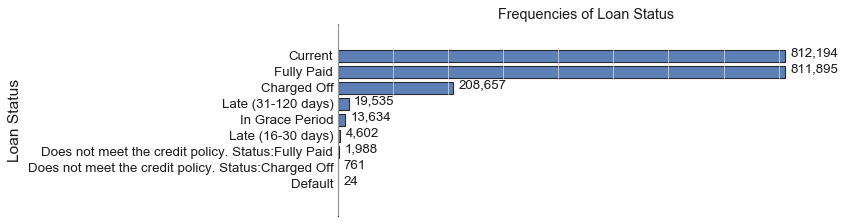

In [12]:
with plt.style.context('classic'): # Discard Seaborn defaults

    counts = all_data.loan_status.value_counts(ascending=True)  
    ind = np.arange(len(counts))  # y-axis

    fig, ax = plt.subplots(figsize=(8, 3))
    ax.barh(y=ind, width=counts, alpha=.9)

    ax.set_title("Frequencies of Loan Status", fontsize=13)
    ax.set_ylabel("Loan Status", fontsize=14)

    ax.set_yticks(ind)  # Get rid of extra ticks on top and bottom
    ax.set_yticklabels(counts.index)
    
    fig.patch.set_facecolor('w')  # Change background color to white  
    ax.grid(axis='x', color='white', linestyle='-')
    sns.despine(bottom=True)
    ax.tick_params(axis='both', which='both',length=0, labelsize=12, labelbottom=False)
    # ax.tick_params(axis='bottom', labelsize = 0)
    for y_position, count in zip(ind, counts):  # Add frequencies
        plt.annotate(format(count, ','), xy=(count+10000, y_position))

plt.show()
plt.close()

As the above figure shows, the vast majority of loans fall into 3 classes: Loans that are still current, loans that were paid back completely, and loans that were written-off. Only a small fraction of loans (only 24, too small to be visible in the graph) are categorized as defaults (meaning that Lending Club has given up hope that they will ever be paid back). Furthermore, there is a small number of loans for which the loan status variable contains the string "does not meet the credit policy" in addition to specifying whether it is fully paid or charged-off. Unfortunately, there is no explanation in the data documentation what exactly this means. I will simply treat them as fully paid or charged off, and ignore the information about not meeting the credit policy, which seems to be a separate variable. However, I do not use the separate variable for prediction, because it is likely that this information only became available after the loan was issued (since presumably the loan would not have been issued if it had been known at the time that the borrower did not meet the credit policy).

The main question we need to decide is what exactly we want to predict.  I opt for a dichotomous classification into "charged off" and "default" versus "fully paid". For simplicity sake, I will call this variable "default". In other words, my category of default mainly includes loans that were charged off, as well as the few loans that are categorized by Lending Club as default.

I will ignore loans which are current or late – from still being in the grace period to up to 120 days late – because their status is yet indeterminate.  We have enough observations already, and thus any gain in accuracy from these additional observations would most likely be more than offset by the increase in variance due to the greater measurement error, because we do not have enough information yet to accurately classify them.

In [13]:
# Create target variable
all_data['default'] = np.NaN
all_data.loc[all_data.loan_status.str.contains('Fully Paid', na=False), 'default'] = 0 
all_data.loc[(all_data.loan_status.str.contains('Charged Off', na=False)|
             (all_data.loan_status=='Default')), 'default'] = 1

In [14]:
# Drop loans with indeterminate status
all_data = all_data.loc[all_data.default.notnull(),:]
# Add loan status to list of variables to drop at the end (after EDA)
variables_to_drop_3 = ['loan_status']

### Dropping columns

Now that we have discarded irrelevant rows, let's discard irrelevant columns. Since we are starting with about 150 columns, this will make the EDA easier.

#### Constant or all-missing columns
Let's start by deleting columns which are either constant or for which all observations are missing:

In [15]:
# Find columns with 0 or 1 unique values
constant_or_missing = [col for col in all_data.columns if all_data.loc[:,col].value_counts().shape[0]<=1] 
print('Columns to be deleted:\n{}'.format(constant_or_missing))

# Delete those columns
all_data = all_data.drop(constant_or_missing, axis=1)

Columns to be deleted:
['member_id', 'pymnt_plan', 'policy_code', 'hardship_flag', 'hardship_type', 'deferral_term', 'hardship_length']


#### Missing values
Now that we have discarded irrelevant rows and columns, let us take a closer look at the data. Firstly, let's see what percentage of each column is missing.

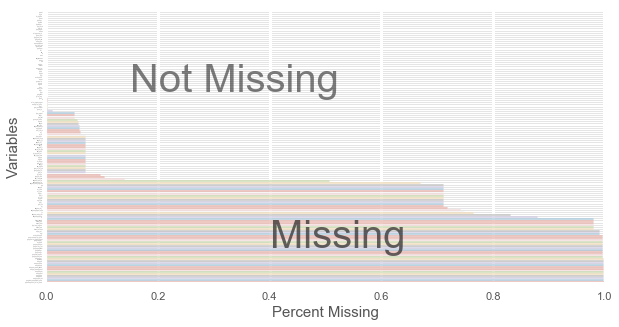

In [16]:
with plt.style.context('ggplot'): # Discard Seaborn defaults
    # Calculate the proportion of missing values for each variable
    missing = (all_data.isnull().sum()/all_data.shape[0]) \
                .sort_values(ascending=False)

    # Plot proportion of missing values for each variable 
    missing.plot(kind='barh', figsize=(10, 5))
    plt.xlim(0, 1)
    plt.xlabel('Percent Missing', fontsize=15)
    plt.ylabel('Variables', fontsize=15)
    plt.tick_params(axis='y', length=0, labelsize = 0)
    plt.grid(color="white", axis='x', linewidth=3)
    plt.text(x=.15, y=100, s='Not Missing', fontsize=40, alpha=.6)
    plt.text(x=.4, y=18, s='Missing', fontsize=40, alpha=.7)

    plt.show()
    plt.close()

Let us first focus on the big picture not worry about any individual variables. This reveals reveals an interesting pattern: Most variables cluster into groups with either no missing values (about a third of the variables), around 10% missing values (about a quarter), around 70% missing values (roughly 10% of variables), or almost all missing values (about a third of variables).

The fact that there are no variables that have between 15% and 65% missing values makes it easier for us to decide at what proportion of missing values we should draw a cut-off between dropping a variable and imputing missing values. I will choose 30% missing as the threshold, but any threshold between around 15% and around 65% would yield identical results.
    
This pattern could be due to the fact that, at certain points in time, additional groups of variables were started to be collected. To look into this, let's aggregate the proportion of missing values by month and look for a time trend.

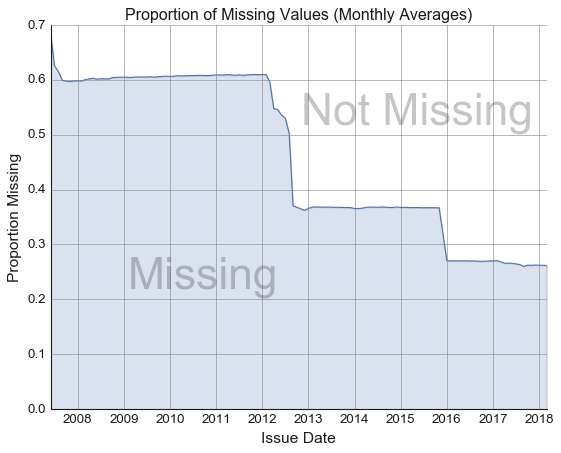

In [17]:
# Group-by month and calculate percentage of missing values
missing_by_year = all_data.groupby('issue_d').apply(lambda x: x.isnull().sum().sum()/(x.shape[0]*x.shape[1]))

with plt.style.context('classic'): # Discard Seaborn defaults
    fig, ax = plt.subplots()

    ax.plot(missing_by_year)
    ax.set(xlim=(min(missing_by_year.index), max(missing_by_year.index)), 
           ylim=(0, .7)) 
    ax.set_ylabel('Proportion Missing', fontsize=14)
    ax.set_xlabel('Issue Date', fontsize=14)
    ax.set_title('Proportion of Missing Values (Monthly Averages)')
            
    ax.tick_params(length=0) 
    ax.fill_between(missing_by_year.index, 0, missing_by_year.values, alpha=.2)
    ax.grid(color='grey', linestyle='-')
    fig.patch.set_facecolor('w')       
    sns.despine()
    plt.text(x=missing_by_year.index[20], y=.22, s='Missing', fontsize=40, alpha=.25)
    plt.text(x=missing_by_year.index[65], y=.52, s='Not Missing', fontsize=40, alpha=.25)
    
plt.show()
plt.close()

It does indeed look like over time more and more variables were collected, and that these additional columns were for the most part added during three distinct time periods: In mid-2007 (only a few months after the first observations were collected), in 2012, and in late-2015.

To verify that it is in fact the same variables that are missing for a particular time period, we need to disaggregate these results by individual variables. If this shows that a particular variable has missing values that are distributed relatively evenly through time, we need to take a second look at the meaning of the variable before dropping it to make sure that missingness does not simply denote that a variable is not applicable.  Obviously, if that was the case, there is no reason to drop it because it is not really missing – though we do have to find a way how to properly encode it. 
Conversely, if missingness for a particular variable mainly stems from the fact that its observations were not collected during a substantial part of our sample period, we know that we can safely discard it. 

In the plot below, only variables that have at least one missing observation will be shown. Unfortunately, we still have too many columns to display the names of individual columns, so let's just focus on the big picture and plot smaller subsets later. Each column denotes a particular variable, and each row denotes an observation, ordered from earliest (top) to latest (bottom). Missing values are plotted as white, and non-missing values are plotted as black.  On the very right, there is a line graph that is supposed to show the number of non-missing values for each observation (ranging from 43 to 134), but due to the large number of observations graphed here, it is not very useful and can safely be ignored. 

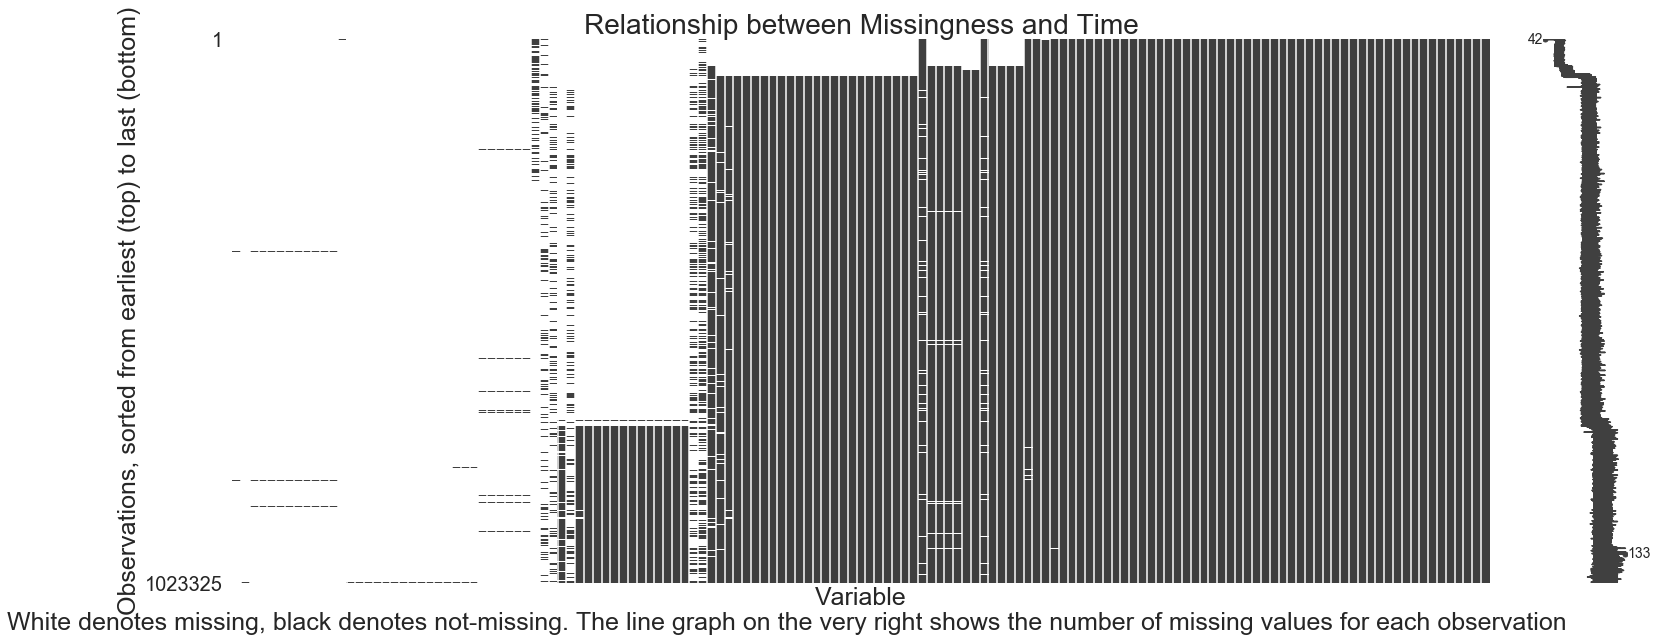

In [18]:
# Plot missing data
missingno.matrix(all_data.loc[:, missing.index])
plt.title('Relationship between Missingness and Time', \
          fontsize=28)
plt.ylabel('Observations, sorted from earliest (top) to last (bottom)', fontsize=25)
plt.xlabel('Variable', fontsize=25)
plt.figtext(x=0, y=.06, s='White denotes missing, black denotes not-missing. The line graph on the very right '
            'shows the number of missing values for each observation', fontsize=25)
plt.show()
plt.close()

This reveals that – with a few notable exceptions – most of the missingness is indeed caused by the fact that many variables were not collected over the whole sample period. At the same time, there are also a few variable with a substantial proportion of missing values that are distributed relatively evenly across time.

In order to be able to display the variable names, we need to split the variables up into several plots. Let's start with those variables that have the highest proportion of missingness: 

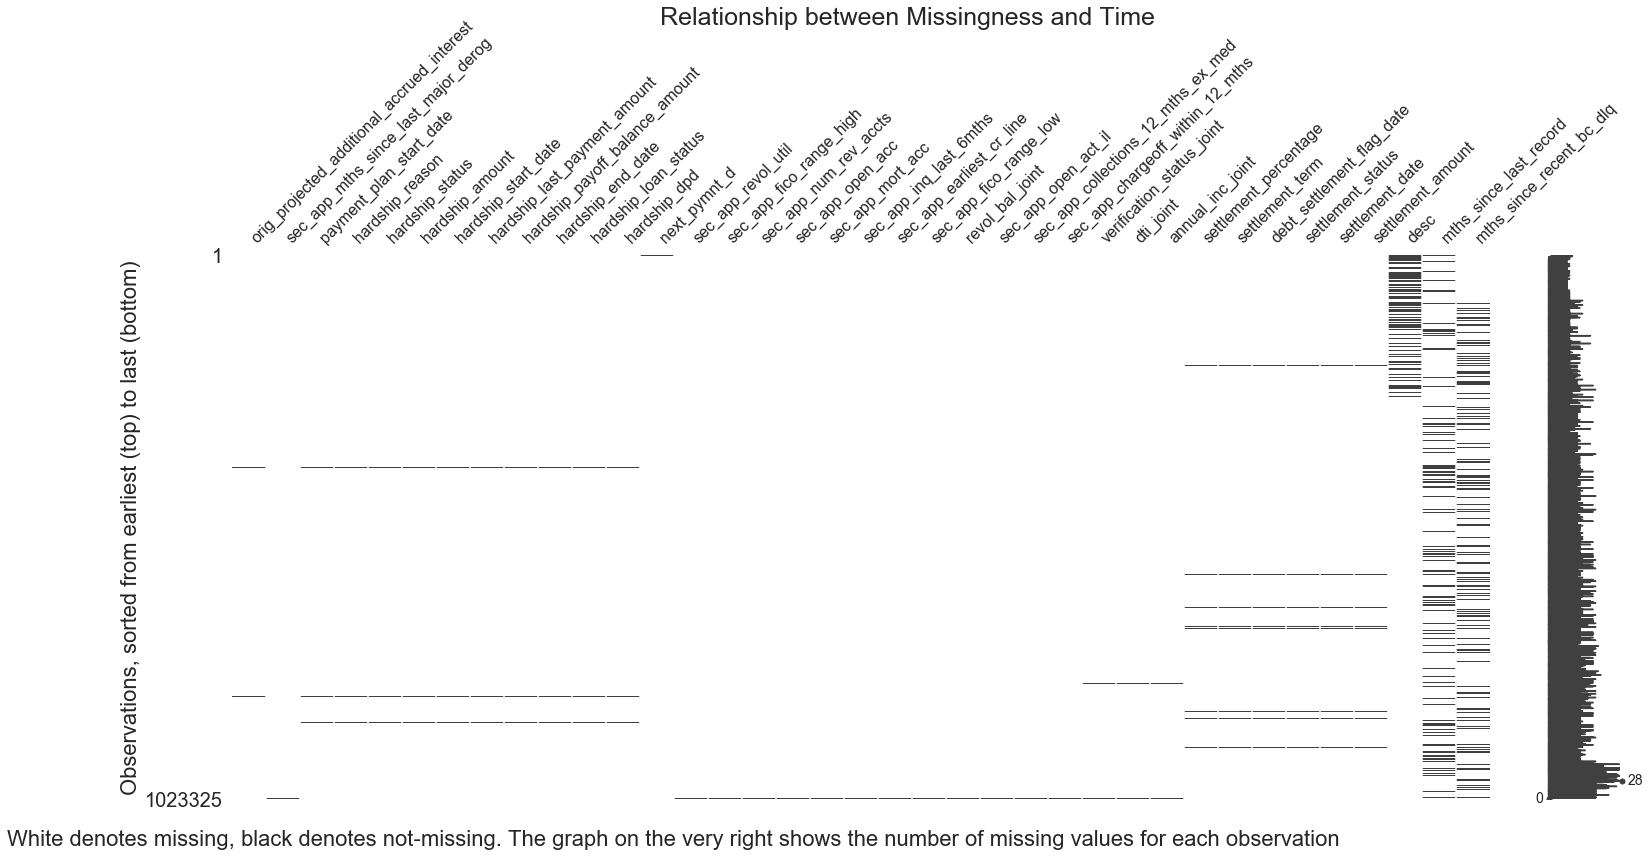

In [19]:
# Note that I don't explicitly exclude columns that have no missing values, because those will 
# automatically be discarded as irrelevant by missingno.
variables_to_plot_1 = missing[missing>.75].index # Select columns
missingno.matrix(all_data.loc[:, variables_to_plot_1])
plt.figtext(x=.5, y=1.2, s='Relationship between Missingness and Time', 
            fontsize=25, horizontalalignment='center')
plt.ylabel('Observations, sorted from earliest (top) to last (bottom)', fontsize = 22)
plt.figtext(x=0, y=.06, s='White denotes missing, black denotes not-missing. The graph on the very right '
            'shows the number of missing values for each observation', fontsize=22)
plt.show()
plt.close()

Most of these variables can safely be discarded since they were only collected for part of the sample period. The exceptions are the two rightmost variable, for which missingness is distributed relatively evenly across time. Thus, we will add them to a list of variables which to inspect later to make sure missingness doesn't actually stand for "not applicable".

In [20]:
# Create a list of variables to inspect later, and add the last two variables
variables_to_inspect = list(variables_to_plot_1[-2:])

# Create a list of variables to delete, and add all the plotted variables except the last two
variables_to_drop = list(variables_to_plot_1[:-2])

Now let's plot the remaining variables for which at least 30% of the values are missing. 

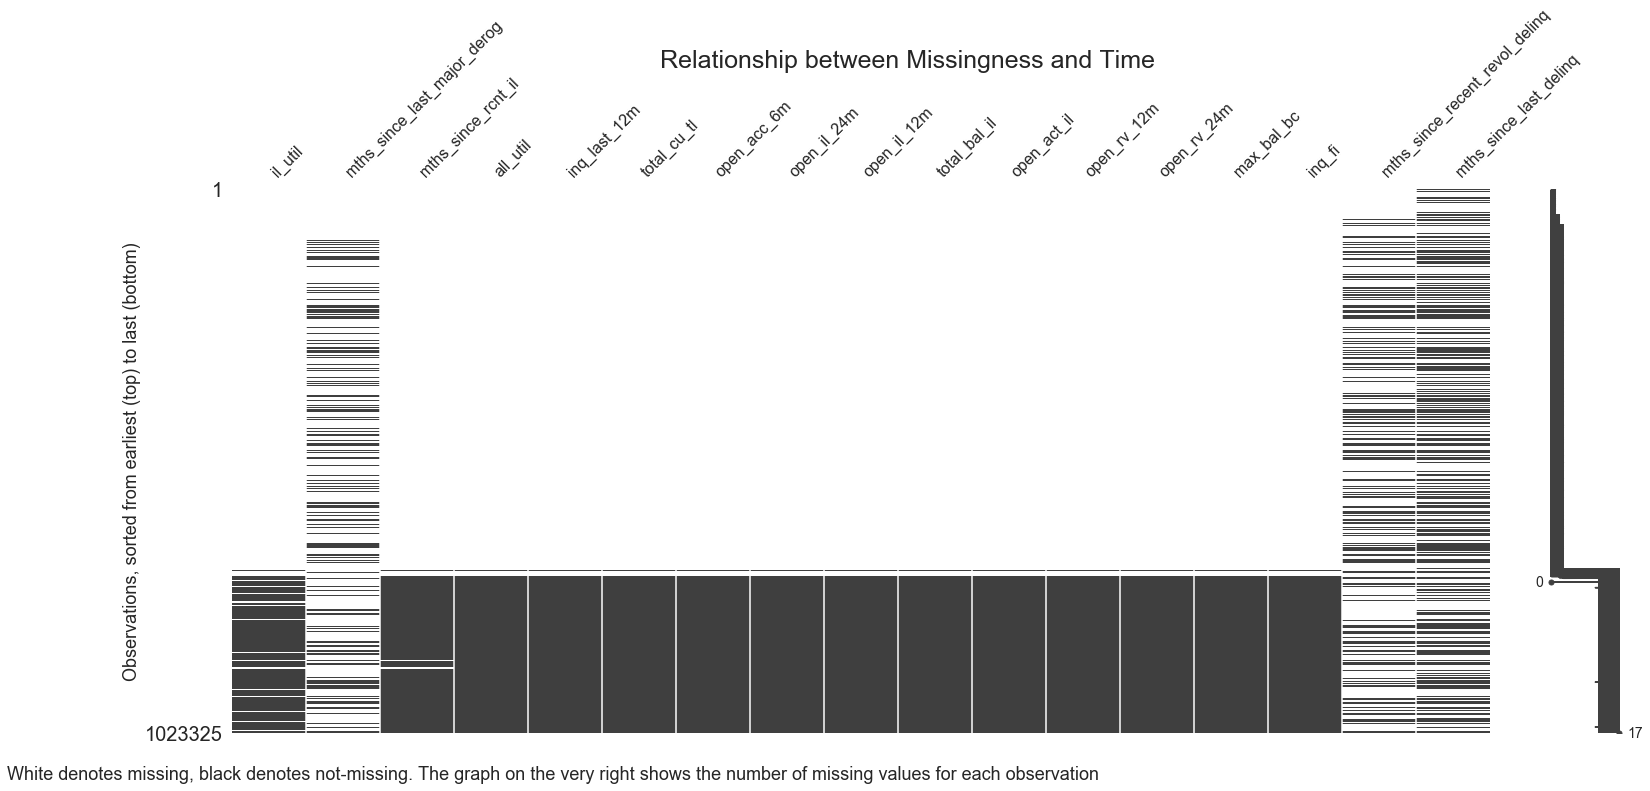

In [21]:
variables_to_plot_2 = missing[(missing <= .75) & (missing > .3)].index # Select columns
missingno.matrix(all_data.loc[:, variables_to_plot_2])
plt.ylabel('Observations, sorted from earliest (top) to last (bottom)', fontsize = 18)
plt.figtext(x=.5, y=1.05, s='Relationship between Missingness and Time', 
            fontsize=25, horizontalalignment='center')
plt.figtext(x=0, y=.06, s='White denotes missing, black denotes not-missing. The graph on the very right '
            'shows the number of missing values for each observation', fontsize=18)
plt.show()
plt.close()

Again, most of these variables were only collected for the last portion of the sample period, so we will discard them. However, for three variables missingness is distributed relatively evenly across time, so we will add them to the list of variables to inspect later.

In [22]:
# Add variables to list of variables to inspect later
variables_to_inspect.extend(['mths_since_last_major_derog', 
                             'mths_since_recent_revol_delinq',
                             'mths_since_last_delinq'])

# Add variables to list of variables to delete
variables_to_drop.extend([v for v in variables_to_plot_2 if v not in variables_to_inspect])

Finally, let's plot missingness for variables that have 30% or less missing values. (We will ignore variables that have less than 0.5% missing values, because this is close enough to zero for our purposes to be ignored, and this reduces the number of variables sufficiently to fit them into one plot.)

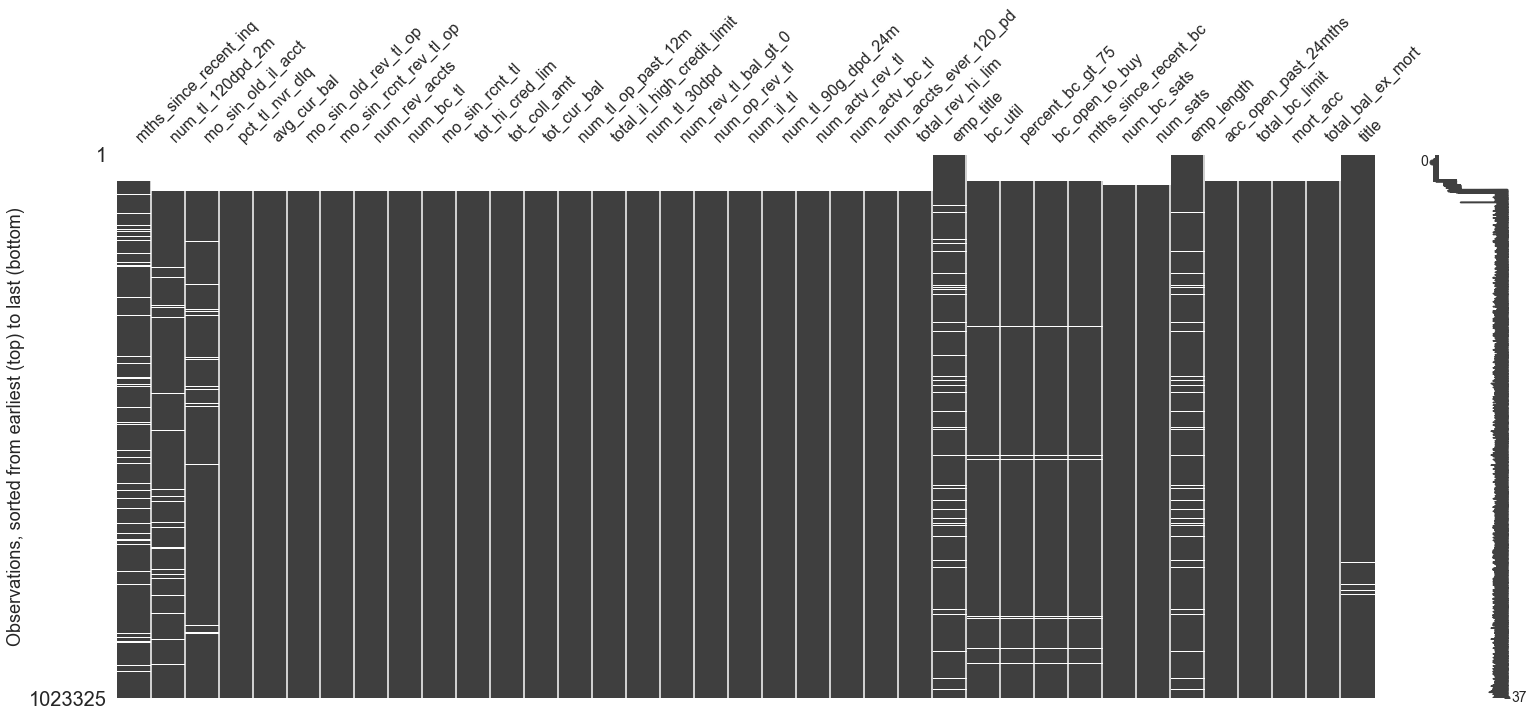

In [23]:
variables_to_plot_3 = missing[(missing <= .3) & (missing > .005)].index # Select columns
missingno.matrix(all_data.loc[:, variables_to_plot_3])
plt.ylabel('Observations, sorted from earliest (top) to last (bottom)', fontsize = 18)
plt.show()
plt.close()

For most of these variables, missing values are concentrated in the early part of the sample. Since the total number of missing values is only around 10%, there is no need to drop these variables, because we can easily impute the missing values. Let's take a look until what date those variables are missing.

In [24]:
# Get date for first non-missing value
for v in variables_to_plot_3:
    print(all_data.loc[all_data[v].notnull(),:].index[0])

(Timestamp('2012-03-01 00:00:00'), '1120309')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'), '1124351')
(Timestamp('2012-08-01 00:00:00'),

This shows that, even though missingness only concerns about 10% of total observations, it spans until about the middle of our sample period, 2012.  This is because the monthly loan volume increased sharply over the years. One could argue that it may be better to drop those early observations rather than imputing them based on data from different years. I think either strategy is defensible, but I opted to keep all the data, because there is no reason to assume that the relationship among the predictors has changed. (Even if it did, this would only affect around 1/4 of the observations for only about 10% of the sample, which comes down to only a few percent of total values.) 

Let us now inspect the variables we have singled out, to see whether missingness simply stands for "not applicable" instead of "value was not collected". Let's first print their names:

In [25]:
variables_to_inspect

['mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq']

All five variables refer to the number of months since a specific event which does not apply to all borrowers occurred (e.g., experiencing a delinquency or a derogatory public record). This explains why missingness for those variables is distributed relatively evenly across time: For those borrowers to which the particular event does not apply, the time since this event happened was encoded as missing. Unfortunately, though, there is no value in pandas that stands for "not applicable", so we need to decide how we are going to encode these for our predictive models.

The best encoding seems to be to raise these variables to a negative power (similar to a Box-Cox Transformation). This would give the most recent events the highest scores, reflecting that those are the most relevant. For less recent events, the score would gradually converge towards zero, and we could thus encode "not applicable" as zero. This models the assumption that, once an event is far enough into the future, its relevance declines, and if it is long enough ago, it is almost equivalent to it not having happened at all.

One important question, of course, is *how fast* exactly the relevance of an event declines. We could try different powers since you which makes the distribution most symmetrical, but for simplicity's sake, I will simply choose -0.5 for now.

Let's go ahead and carry out these transformations. First, we need to check the prerequisite that all values are positive.  

In [26]:
# First check that all values are positive
all_data.loc[:, variables_to_inspect].min()

mths_since_last_record            0.0
mths_since_recent_bc_dlq          0.0
mths_since_last_major_derog       0.0
mths_since_recent_revol_delinq    0.0
mths_since_last_delinq            0.0
dtype: float64

Unfortunately, for each variable the minimum is zero, for which negative powers are not defined.  So let's take a closer look at the smallest values for each variable to get a sense what's going on:

In [27]:
for v in variables_to_inspect:
    print(v, ': \n', 
          all_data.loc[:, v]
            .value_counts()
            .sort_index()
            .head(3), 
          '\n')

mths_since_last_record : 
 0.0    1282
1.0      86
2.0      89
Name: mths_since_last_record, dtype: int64 

mths_since_recent_bc_dlq : 
 0.0     447
1.0    1379
2.0    1439
Name: mths_since_recent_bc_dlq, dtype: int64 

mths_since_last_major_derog : 
 0.0    205
1.0    763
2.0    830
Name: mths_since_last_major_derog, dtype: int64 

mths_since_recent_revol_delinq : 
 0.0     741
1.0    2555
2.0    2796
Name: mths_since_recent_revol_delinq, dtype: int64 

mths_since_last_delinq : 
 0.0    1814
1.0    3784
2.0    4774
Name: mths_since_last_delinq, dtype: int64 



For most variables, the number of zeros are smaller than the number of ones and twos.  This suggests that these zeros may have occurred naturally.  However, for the first variable, the number of months since the last derogatory public record, there is an inflated number of zeros. This means that for this variable "not applicable" was encoded inconsistently: As we saw above, it was encoded as "missing" for a large number of observations; however, in other cases it seemingly was encoded as zero instead. 

Let's test this hypothesis by zooming in on observations for which the number of months since the last derogatory public record is zero, and let's see if their count of public records is positive (which is what we would expect if zero means that they just had such an event). Unfortunately, we only have the count for the actual events for two out of our four variables in question, so let's see start with these.

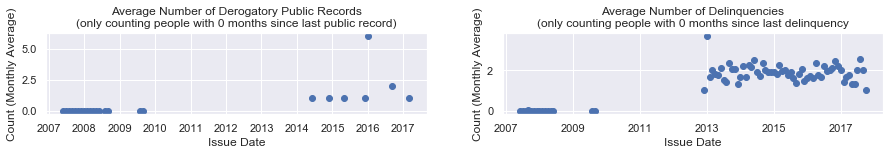

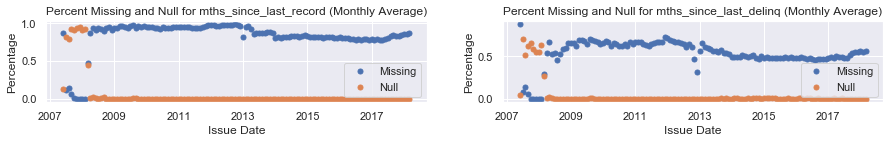

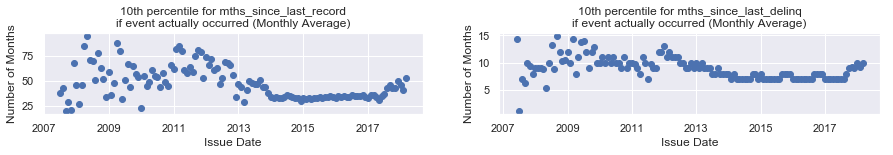

In [28]:
# Row 1: Group data by month and plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 1.5))

all_data.loc[all_data.mths_since_last_record == 0, 'pub_rec'] \
    .reset_index(level='id', drop=True) \
    .resample('MS') \
    .mean() \
    .plot(style='o', ax=ax[0])
ax[0].set(ylabel='Count (Monthly Average)',
          xlabel='Issue Date',
          title='Average Number of Derogatory Public Records\n'
               '(only counting people with 0 months'
               ' since last public record)')

all_data.loc[all_data.mths_since_last_delinq == 0, 'delinq_2yrs'] \
    .reset_index(level='id', drop=True) \
    .resample('MS') \
    .mean() \
    .plot(style='o', ax=ax[1])
ax[1].set(ylabel='Count (Monthly Average)',
          xlabel='Issue Date', 
          title='Average Number of Delinquencies\n'
                '(only counting people with 0 months '
                'since last delinquency')
plt.show()


# Row 2: Plot percentage missing and null
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 1.5))

for subplot, v in zip(ax.ravel(), [variables_to_inspect[0], variables_to_inspect[-1]]):
    # Percent missing
    all_data.loc[:, v] \
        .reset_index(level='id', drop=True) \
        .isnull() \
        .resample('MS') \
        .mean() \
        .plot(style='o', markersize=5, ax=subplot, label='Missing')
    # Percent null
    (all_data.loc[:, v] \
        .reset_index(level='id', drop=True) \
        == 0) \
        .resample('MS') \
        .mean() \
        .plot(style='o', markersize=5, ax=subplot, label='Null')

    subplot.set(ylabel='Percentage',
              xlabel='Issue Date',
              title='Percent Missing and Null for {} (Monthly Average)'
                .format(v))
    subplot.legend()
plt.show();


# Row 3: 10th percentile for positive counts
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 1.5))

for subplot, v in zip(ax.ravel(), [variables_to_inspect[0], variables_to_inspect[-1]]):
    all_data.loc[:, v] \
        .reset_index(level='id', drop=True) \
        .replace(to_replace=0, value=np.NaN) \
        .resample('MS') \
        .apply(lambda x: x.quantile(.1)) \
        .plot(style='o', ax=subplot)
    subplot.set(ylabel='Number of Months',
              xlabel='Issue Date',
              title='10th percentile for {}\nif event actually occurred (Monthly Average)'
                .format(v))
plt.show()

These plots demonstrate two important insights: In the first row we see that for the early years, the event counts are all zero, even though the borrower's last event supposedly occurred zero months ago. The second zero shows why this is so: For the early years, "0" was used to denote that the number of months since the last public record/delinquency is not applicable. Later, not applicable was denoted by missing values. Confusingly, though, the old values were never updated to establish consistency. 

However, this still leaves the question why there are no zeros at all for 2010 through 2012/14. The plots in the third row suggest an answer: In the early years, Lending Club seemed to pursue a more conservative strategy: If we only zoom in on people for which the event (derogatory public record or delinquency) *did* occur, loans were usually only approved if this event occurred far into the past: For public records, the 10th percentile initially fluctuated between around 50 and 70 months, but then declined to around 30 months. (Note that the higher fluctuation in the early years is due to the smaller sample sizes per month that we are averaging over.) Similarly, the 10th percentile for the average time since the last delinquency decreased from around a year to a little over half a year. As a result, once Lending Club stopped using zeros to encode "not applicable", we do not observe any people who had a public record zero months ago until the lending policy became more aggressive so as to consider such more risky borrowers in 2013/14.

Thus, let's use the following strategy for transforming variables: First, we add one to all variables, so we can raise them to a negative power. Secondly, we go ahead and raise them to the power of -0.5. Thirdly, where the original variable is zero but stands for "not applicable", or is missing standing for "not applicable", we set our transformed variable to zero. Note that this is equivalent to setting the original variable to infinity and then carrying out the power transformation. This models that when the event did not occur, this is equivalent to it occurring an infinite number of years ago.

The only remaining issue is that for three out of our five variables, we don't have a count for the number of events, so we don't know if zero stands for "not applicable" or zero. But if the other two variables analyzed above are a guide, the encoding changed sometime in early 2008. Thus, let's have a look when we encounter the first zeros in the variables where we don't have the event counts:

In [29]:
for v in variables_to_inspect[1:4]:
    print(v, ': {}' \
          .format(all_data.loc[:, v] \
                    .dropna() \
                    .reset_index(level='id', drop=True) \
                    .index[0]))

mths_since_recent_bc_dlq : 2012-08-01 00:00:00
mths_since_last_major_derog : 2012-08-01 00:00:00
mths_since_recent_revol_delinq : 2012-03-01 00:00:00


This is good news for us: The first zeros only occur in 2012, far after the practice of using zeros to encode "not applicable" stopped for the other variables where we to have better information about it. Thus, we don't need to set any zeros to missing here.

Let's now go ahead and carry out the transformation as described above:

In [30]:
# List to store transformed variables
new_variables = []
# Create a list with corresponding counts for each variables
event_counts = ['pub_rec', None, None, None, 'delinq_2yrs']

# Perform transformations
for v, count in zip(variables_to_inspect, event_counts):
    # Get the variable and add 1
    v_transf = all_data.loc[:, v] + 1
    # Perform power transformation
    v_transf = v_transf ** -0.5
    # pdb.set_trace()
    # Set values to zero where event did not occur
    if count is not None: # If we have a count variable:
        # Get boolean mask where event did not occur
        zero_count = all_data.loc[:, count]==0
        # Set values to zero 
        v_transf.loc[zero_count] = 0
    else: # Where we don't have event count, set all missings to zero
        v_transf = v_transf.fillna(0)
        
    # Store transformed variable
    new_variables.append(v_transf)
            
# Concatenate transformd variables into data frame
new_df = pd.concat(new_variables, axis='columns')
['inv_sqrt_1p_' + v for v in variables_to_inspect]
# Add variable names
new_df.columns = ['inv_sqrt_1p_' + v for v in variables_to_inspect]
# Print proportion of non-missing observations
print('Proportion of non-missing observations:\n{}'
         .format(new_df.notnull().sum() / new_df.shape[0]))
# Add variables to our main data frame
all_data = pd.concat([all_data, new_df], axis='columns')
# Delete temporary data frame
del new_df

Proportion of non-missing observations:
inv_sqrt_1p_mths_since_last_record            0.999972
inv_sqrt_1p_mths_since_recent_bc_dlq          1.000000
inv_sqrt_1p_mths_since_last_major_derog       1.000000
inv_sqrt_1p_mths_since_recent_revol_delinq    1.000000
inv_sqrt_1p_mths_since_last_delinq            0.997700
dtype: float64


Looking at the proportion of non-missing values, we see that our transformations were able to successfully deal with any missing values that should not actually be missing.

Now let's go ahead and drop both the original variables before the transformation, as well as other variables that we marked for deletion above due to an excessive number of missing values:

In [31]:
# Drop variables with too many missing values
all_data = all_data.drop(variables_to_drop + variables_to_inspect, axis='columns')

#Print number of deleted variables
'{} variables were dropped'.format(len(variables_to_drop))

'49 variables were dropped'

#### Endogenous columns
It is also important that we drop columns that contain information that was not available at the time the loan was issued (e.g., whether the borrower experienced hardship during the payback period). Needless to say, failing to do so could give us an unfair edge if we included any of these variables in our model. (In the language of statistics, they are endogenous to our model since they are part of what we want to explain rather than part of what we can use for the explanation.) 

Unfortunately, the only way to identify those variables is to go through all variables by hand and consider their meaning. So let's print all column names:

In [32]:
all_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amn

Looking up the meaning of the variables in the data dictionary reveals a number of variables were not known at the time the loan was issued: The most obvious ones relate to the amount and timing of the borrower's payments, and whether any late fees or even a debt settlement occurred. Those will all be deleted. 

Beyond those clear-cut cases, a few variables require more explanation: Firstly, we have information on the grade and sub-grade of the loan, which was calculated by a Lending Club.  I will discard these variables because I want to make my own prediction of a borrower's creditworthiness. 

The same is true of the interest rate, though things are slightly more complicated here: On the one hand, the interest rate borrowers receive is a summary of their other attributes that make them more or less likely to default, similar to the loan grade.  On the other hand, it also has an additional causal impact on their probability of default since it influences the monthly payments or the length of the payback period.  However, we can resolve this dilemma by directly including the monthly payment amount as well as the loan term as predictors. Since these are presumably the only channels through which the interest rate exerts a causal effect on the default rate, we can safely discard the interest rate. 

Note that it may make sense to keep the interest rate as well as the loan grade around for the rest of the EDA (e.g., to visualize the average default rate broken down by loan grade), so we will add them to a separate list of variables to be deleted later.

In [33]:
# Variables to delete now
endogenous = ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
              'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
              'debt_settlement_flag']

# Variables to delete later (keep around for EDA)
endogenous_2 = ['int_rate', 'grade', 'sub_grade']

Going through the meaning of our variables also reveals a number of irrelevant variables that we can delete: Most obviously, the URL of the listing data  does not tell us anything useful. The same is true of initial listing status (whether loan was sold whole or fractional), since this was decided randomly.

Finally, in addition to the amount that the borrower applied for, we also have information on both the amount that was funded overall, and the amount that was funded through Lending Club's investors. While neither the data dictionary nor the website explains how this discrepancy is funded, this need not concern us. We will only keep the overall amount that was funded, and discard the amount that was funded through investors, as well as the amount that the borrower originally applied for. Even though a discrepancy between those variables may contain useful information, it is better not to include it as a predictor: Both Lending Club and its investors presumably made their decision to only partially fund a loan request based on the same information we have available, and we want to make our own prediction. Thus, we will add those variables to the list of irrelevant variables to be deleted.

In [34]:
irrelevant = ['url', 'initial_list_status', 'loan_amnt', 'funded_amnt_inv',]

Now let's go ahead and delete both the irrelevant and the endogenous variables (except those endogenous variables we decided to keep around for the rest of the EDA).

In [35]:
# Deleting variables
all_data = all_data.drop(endogenous + irrelevant, axis='columns')

### Making sure variables are of the right type
Now let's inspect the data type for each column. First, let's all the unique data types we have:

In [36]:
np.unique(all_data.dtypes)

array([dtype('float64'), dtype('O')], dtype=object)

At the moment, all variables are stored either as floats or as objects. Let's take a look at each in turn, starting with floats.

#### Numerics
The main thing that can be wrong here is that they are actually integers. Note that this only matters if the variable doesn't have any missing values. (Since the integer type cannot represent missing values, we have to store them as floats anyway.) So let's find all variables that are both integers and don't have any missing values.

In [37]:
integers = [variable for variable in all_data.dtypes[all_data.dtypes==float].index
                if all_data.loc[:, variable].apply(float.is_integer).all()]
integers

['funded_amnt',
 'fico_range_low',
 'fico_range_high',
 'revol_bal',
 'last_fico_range_high',
 'last_fico_range_low',
 'default']

Let's convert those variables to integers, since these use less memory.

In [38]:
all_data[integers] = all_data.loc[:, integers].astype(int)

#### Objects
Now let's inspect the remaining variables, which are all of type "object". 

In [39]:
objects = all_data.dtypes[all_data.dtypes=='O'].index
all_data.loc[:, objects].head()

term int_rate grade sub_grade                   emp_title emp_length home_ownership  \
issue_d    id                                                                                                 
2007-06-01 70686   36 months    7.75%     A        A3                   Homemaker  10+ years       MORTGAGE   
           71623   36 months    8.38%     A        A5                         NaN   < 1 year           NONE   
           72176   36 months    9.33%     B        B3                         NaN   < 1 year           RENT   
           72998   36 months    9.64%     B        B4  Halping hands company inc.   < 1 year           RENT   
           73582   36 months   10.28%     C        C1                         NaN   < 1 year           RENT   

                 verification_status                                        loan_status purpose              title  \
issue_d    id                                                                                                        
2007-06-01 70686        Not Verified  Does not meet the credit policy. Status:Fully ...   other     Aroundthehouse   
           71623        Not Verified  Does not meet the credit policy. Status:Fully ...   other       Buying a car   
           72176        Not Verified  Does not meet the credit policy. Status:Fully ...   other    Car repair bill   
           72998        Not Verified  Does not meet the credit policy. Status:Fully ...   other            delight   
           73582        Not Verified  Does not meet the credit policy. Status:Fully ...   other  Wedding coming up   

                 zip_code addr_state earliest_cr_line revol_util last_credit_pull_d application_type  \
issue_d    id                                                                                          
2007-06-01 70686    068xx         CT              NaN        NaN           Feb-2015       Individual   
           71623    100xx         NY              NaN        NaN           Aug-2007       Individual   
           72176    100xx         NY              NaN        NaN           May-2007       Individual   
           72998    021xx         MA              NaN        NaN           Sep-2014       Individual   
           73582    100xx         NY              NaN        NaN           Feb-2013       Individual   

                 disbursement_method  
issue_d    id                         
2007-06-01 70686                Cash  
           71623                Cash  
           72176                Cash  
           72998                Cash  
           73582                Cash

The interest rate and  revolving credit utilization rate can easily be converted to numeric by deleting the appended  "%" from each value.

In [40]:
for variable in ['int_rate', 'revol_util']:
    all_data[variable] = pd.to_numeric(all_data.loc[:, variable].str.replace('%', ''), errors='coerce')

Similarly, the loan term has the unit (months) appended to each value. Since the valid values are either 36 or 60, it is best to model it with a dummy variable. This variable will be 1 if the term is 60 months and 0 if the term is 36 months.

In [41]:
all_data['term_5y'] = np.nan
all_data.loc[all_data.term.str.contains('60 months'), 'term_5y'] = 1
all_data.loc[all_data.term.str.contains('36 months'), 'term_5y'] = 0

In [42]:
all_data.term_5y.value_counts()

0.0    777335
1.0    245990
Name: term_5y, dtype: int64

The variables "earliest credit line" and "last credit pull date" are dates, so let's convert them to datetime objects.

In [43]:
for variable in ['earliest_cr_line', 'last_credit_pull_d']:
    all_data[variable] = pd.to_datetime(all_data.loc[:, variable], format='%b-%Y')

However, it is not these *absolute* dates that will be the best predictors; rather, what ultimately matters is how long ago – relative from the loan issue date – these events occurred. Thus, let's create a new features for this. We will only delete the absolute dates after completing the EDA, because we happen to need them again below, as we will see.

In [44]:
# Create new variables  with time difference
all_data['earliest_cr_line_days'] = \
    (all_data.reset_index(level='issue_d').issue_d.values
    - all_data.earliest_cr_line).dt.days

all_data['last_credit_pull_days'] = \
    (all_data.reset_index(level='issue_d').issue_d.values
    - all_data.last_credit_pull_d).dt.days    

# Mark original variables for deletion
variables_to_drop_3.extend(['earliest_cr_line', 'last_credit_pull_d'])

The remaining variables are categorical. Before fitting our models, we will need to perform one-hot-encoding on them.  However, for the EDA it is more convenient to leave them as objects.

Finally, let's have a look at all our numeric variables to make sure they are not actually ordinal or categorical. The reason we care about this is that we not only have to use different descriptive statistics and visualization techniques during the EDA, but we also need to transform them using one-hot-encoding before using them as predict yours in our machine learning models. The only exception is if the variable only takes on two unique values.

In [45]:
with pd.option_context('display.max_rows', 100):
    print(all_data.dtypes[all_data.dtypes!=object])

funded_amnt                                            int32
int_rate                                             float64
installment                                          float64
annual_inc                                           float64
dti                                                  float64
delinq_2yrs                                          float64
earliest_cr_line                              datetime64[ns]
fico_range_low                                         int32
fico_range_high                                        int32
inq_last_6mths                                       float64
open_acc                                             float64
pub_rec                                              float64
revol_bal                                              int32
revol_util                                           float64
total_acc                                            float64
last_credit_pull_d                            datetime64[ns]
last_fico_range_high    

The only variable that is not actually numeric is our target variable, whether the borrower defaulted. However, since it only takes on two unique values, 0 or 1, this is indeed how we want to encode it.

### Feature engineering
Domain expertise tells us that variables such as the loan amount don't primarily matter in absolute terms (the dollar amount), but relative to a borrower's income. Thus, let's look through the list of all the numeric variables to spot such variables. Then, we can normalize them by dividing through the applicant's annual income.

Note that this normalization is different from any normalization/standardization performed as a preprocessing step for machine learning, which divides each column by a constant. Here, we divide each value in a column by a different value unique to that individual. The goal here is to create a more meaningful feature rather than to scale the variable.

In [46]:
# Sort names of numeric columns alphabetically (so
# that we can compare them more easily to data dictionary)
sorted(all_data.select_dtypes(include=np.number).columns, 
       key=str.lower)

['acc_now_delinq',
 'acc_open_past_24mths',
 'annual_inc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'default',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'earliest_cr_line_days',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'inv_sqrt_1p_mths_since_last_delinq',
 'inv_sqrt_1p_mths_since_last_major_derog',
 'inv_sqrt_1p_mths_since_last_record',
 'inv_sqrt_1p_mths_since_recent_bc_dlq',
 'inv_sqrt_1p_mths_since_recent_revol_delinq',
 'last_credit_pull_days',
 'last_fico_range_high',
 'last_fico_range_low',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl

Before we divide by income, let's see if there are any applicants with zero income.

In [47]:
all_data.annual_inc.isnull().sum()

4

There are indeed 4 zeros for income. Let's go ahead and perform the normalization, and then we can deal with these infinite values. 

Note that I will drop neither the un-normalized variables nor the annual income itself. While most of the information will be contained in the normalized variables, the un-normalized variables may have some additional information, in particular if the annual income fluctuates heavily between years. While this introduces some degree of collinearity, we will simply rely on regularization to sufficiently shrink the coefficients of the un-normalized variables. 

In [48]:
# Normalize monetary variables by income
all_data_ratios = pd.DataFrame({
    'lti': all_data.funded_amnt / all_data.annual_inc,
    'revol_bal_to_inc': 
        all_data.revol_bal / all_data.annual_inc,
    'yearly_installment_to_inc': 
        (12*all_data.installment) / all_data.annual_inc,
    'tot_coll_amt_to_inc': 
        all_data.tot_coll_amt / all_data.annual_inc,
    'tot_cur_bal_to_inc': 
        all_data.tot_cur_bal / all_data.annual_inc,
    'total_bal_ex_mort_to_inc': 
        all_data.total_bal_ex_mort / all_data.annual_inc})

We know that we introduced 4 infinite values due to division by zero.  In addition, we also need to be concerned about extremely large but finite values introduced by dividing by a number close to zero. This will occur for applicants  who did have income, but whose income was low compared to typical full-time jobs.  In order to avoid positive outliers for the new variables, let's truncate these variables.

In order to find an appropriate threshold for truncation, I will plot a histogram of the new variables with vertical lines for 95th, 97.5th, and 99th percentile. Note that we will omit data greater than the 99.9th percentile, in order to avoid compressing the x-axis excessively.

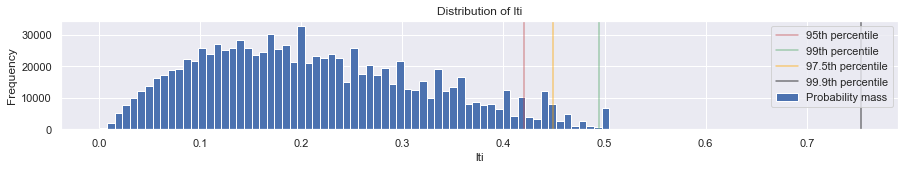

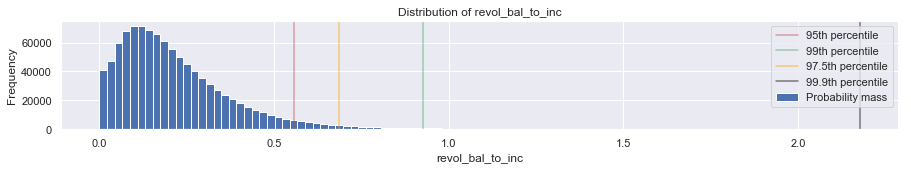

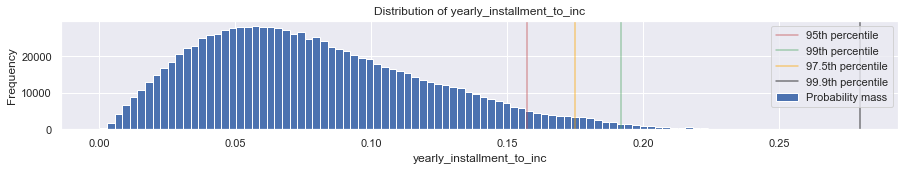

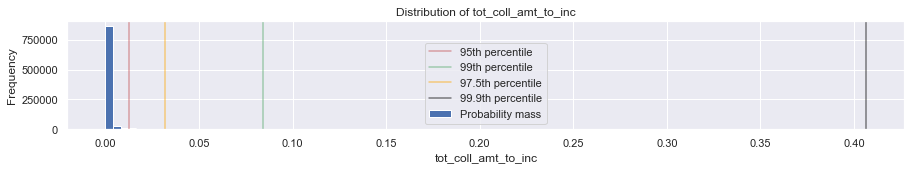

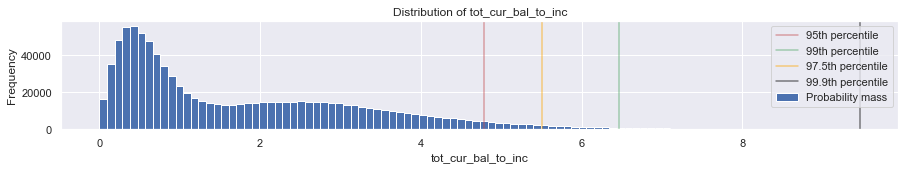

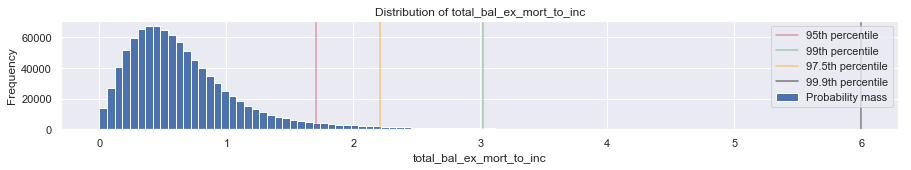

In [49]:
#Plot distribution for each of the new variables
for v_name in all_data_ratios:
    # Get column
    v = all_data_ratios.loc[:,v_name]
    # Get rid of infinite and missing values
    is_fin = np.isfinite(v)
    v = v.loc[is_fin]
    # Compute percentiles
    percentiles = np.percentile(v, [95, 99, 97.5, 99.9])
    # Disregard outliers above 99.9th percentiles
    v = v[v<percentiles[-1]]
    
    # Plot histograms
    v.plot(kind='hist', bins=100, figsize=(15,2), label='Probability mass')
#     pdb.set_trace()
    
    # Add lines for percentiles 
    plt.axvline(x=percentiles[0], color='r', alpha=.5, label='95th percentile')
    plt.axvline(x=percentiles[1], color='g', alpha=.5, label='99th percentile')
    plt.axvline(x=percentiles[2], color='orange', alpha=.5, label='97.5th percentile')
    plt.axvline(x=percentiles[3], color='black', alpha=.5, label='99.9th percentile')
    
    plt.legend()
    plt.title(f'Distribution of {v_name}')
    plt.xlabel(v_name)
    plt.show()

It looks like the 97.5th percentile might be a good threshold for truncation, as it gets rid of the extreme outliers while not being so high as to be untypical for the distribution. Thus, let's implement the truncation.

In [50]:
def process_outliers(v):
    """Substitutes all values above 95th percentile, including infinites, with 95th percentile."""
    
    # Computer 95th percentile (discard infinite values first)
    v_finite = v[np.isfinite(v)]
    q_975 = np.percentile(v_finite, 97.5)
    
    # Substitute values greater than 95th percentile with 95th percentile
    v.loc[v > q_975] = q_975
    return v

# Remove outliers from all ratio variables
all_data_ratios = all_data_ratios.apply(process_outliers, axis=0)

# Add a ratio variables to the main data frame
all_data = pd.concat([all_data, all_data_ratios], axis=1)

### Analyzing distributions
#### Distribution of numeric variables

Let's now inspect the (univariate) distribution for each variable with a boxplot. We will start with numeric variables. Two questions are of main interest here: Firstly, we want to examine if the distribution is skewed. If this is the case, it is usually best to apply a transformation to reduce this skew. Secondly, are there any outliers? Oftentimes, outliers are the result of a skewed distribution, and thus the same transformation that reduces skew frequently also makes outliers less severe. However, if this is not enough, we should take a closer look at the particular observation to determine if it looks like a measurement or data entry error has occurred. In this case, we may drop the offending observations.

A good way to examine skew and look for outliers is to graph the distribution for each variable with a boxplot.
(The exception are variables with only a small number (Less than 10) of unique observations, we will plot these by means of a histogram with a binwidth of one.) 

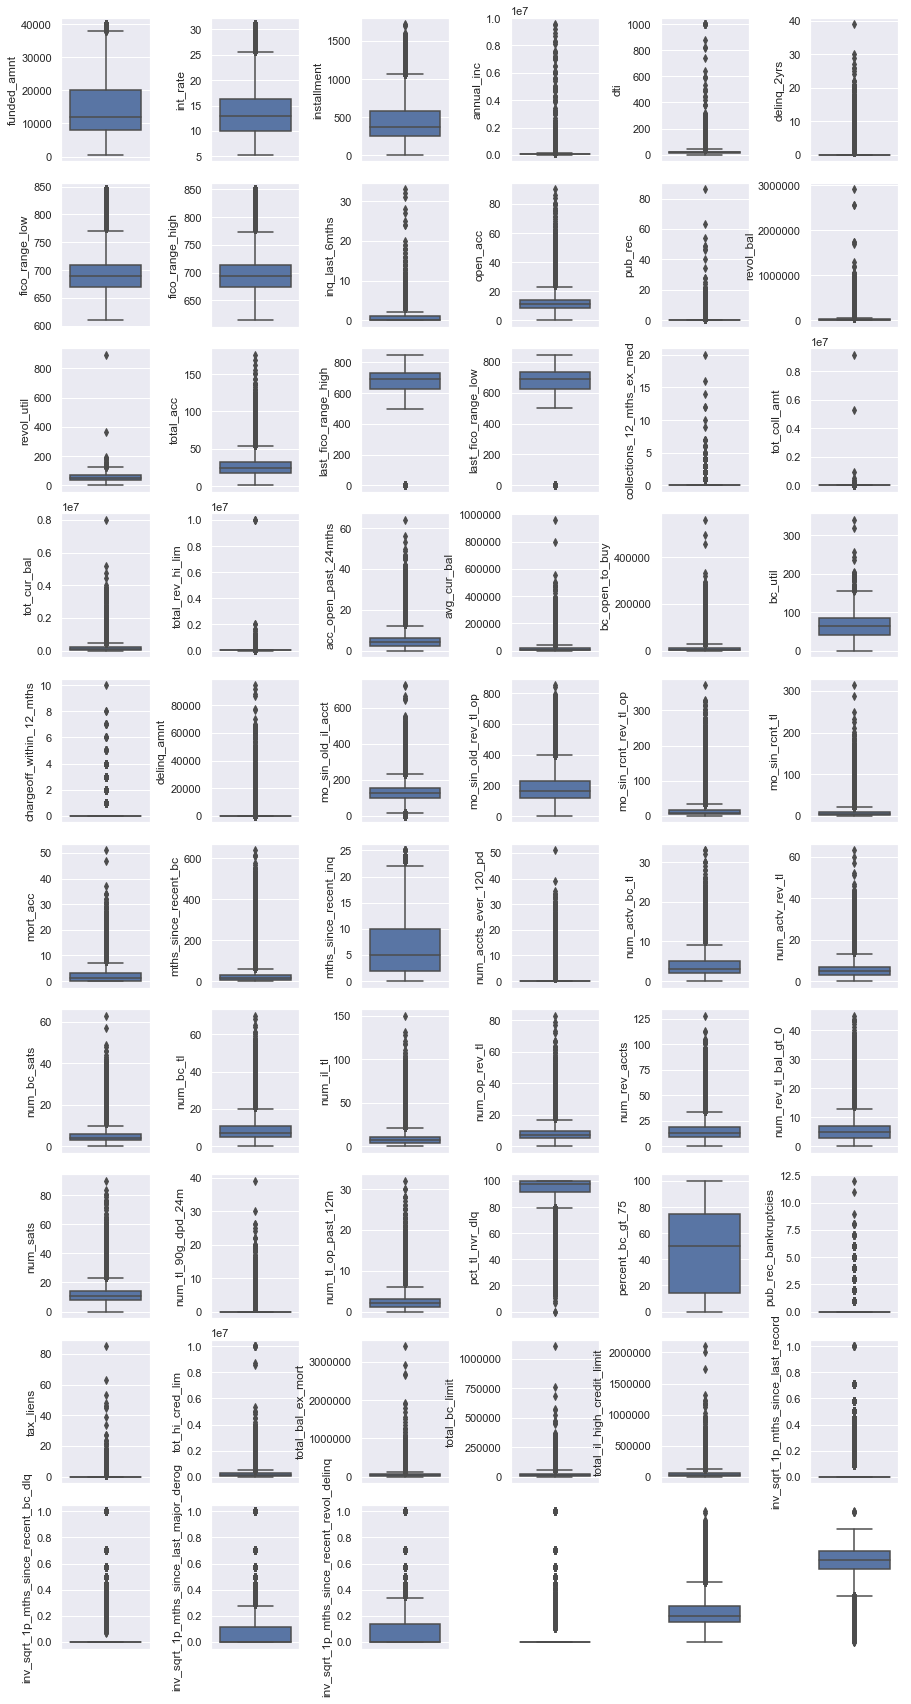

In [51]:
# get names of all the numeric variables
numerics = all_data.select_dtypes(include=[np.number]).columns.tolist()
# Count the number of unique values for each numeric variable
n_unique = all_data.loc[:, numerics].nunique()
# Add variables with more than 10 unique values to a list of variables to
# plot with a boxplot, otherwise to list for histogram
numerics_box = n_unique[n_unique >= 10].index
numerics_hist = n_unique[n_unique < 10].index  

# Make a boxplot for each
#with sns.axes_style('whitegrid'): # Discard Seaborn defaults
fig, ax = plt.subplots(nrows=10, ncols=6, figsize=(15,30))
for subplot, variable in zip(ax.ravel(), numerics_box):
    sns.boxplot(all_data.loc[all_data[variable].notnull(), variable],
                orient='v', ax=subplot)
    
# Delete the last subplots that we didn't need 
# (starting with the 5th in the last row)
for column_index in range(3, 6):
    ax[-1, column_index].axis('off')

# Increase spacing between plots    
fig.subplots_adjust(hspace=.15, wspace=.7)

plt.show()
plt.close()

Due to the large number of variables, we will not spend too much time looking at each single plot but rather just try to get a feel for the big picture and look for anomalies. The first thing that stands out is that most of our variables are right-skewed (have fat tails on the right). This is best addressed with a log-transformation. (All variables are positive, and while some contain zeros, we can simply add 1 to them before taking the log.) To automate this, I create a function that tests for each variable if a log-transformation would reduce the skew. If so, it applies the log-transformation (and moves the original variable to a new data frame in case we need it later).

Before we do that, however, we need to address one anomaly in the *last* FICO score range: For both its high and low, there are zeros, which is impossible since the score only ranges from 300-850. We will set these values as missing. But first let's count the percentage of zeros to make sure this doesn't introduce too many missing values.

In [52]:
print(round((all_data.last_fico_range_low<300).mean(), 4))
print(round((all_data.last_fico_range_high<300).mean(), 4))

0.0255
0.0002


In [53]:
all_data.shape

(1023325, 87)

It doesn't introduce more than 3% of additional missing values, so we can go ahead and set these zeros as missing.

In [54]:
for v in ['last_fico_range_high', 'last_fico_range_low']:
    all_data.loc[all_data[v]==0, v] = np.nan

Furthermore, though this isn't really visible from the box plots above, the debt-to-income-ratio (dti) contains a negative value, -1. This anomaly only became clear further below when I applied the log-transformation to the data.  However, to streamline the presentation of my analysis by avoiding having to repeat some steps with the error corrected, I already set this erroneous value to missing here.

The reason we can be confident that this is indeed a data-entry error is that the debt-to-income ratio cannot be negative. (It is true that we could think of wealth as negative debt, or we could imagine circumstances under which we could treat a person's income as negative. However, these definitions would not only be uncommon, but a negative value for the debt-to-income ratio also occurs only once in the whole data set, which seems virtually impossible if those definitions were used.)

Thus, let's set this value to missing.

In [55]:
all_data.loc[all_data.dti==-1, 'dti'] = np.nan

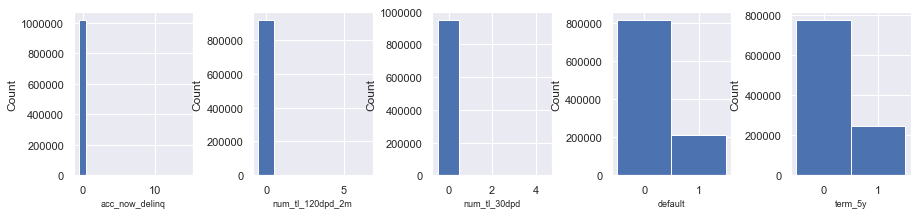

In [56]:
# Distribution of numeric variables with less than 10 observations
# TODO: Add title for the whole plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,3))
for subplot, v in zip(ax.ravel(), numerics_hist):
    # Get associated column (drop missing values)
    col = all_data.loc[all_data[v].notnull(), v]
    # Make one bin for each value in the variable's range
    bins = np.arange(col.min() - 0.5, col.max() + 1.5)
    # Plot histogram 
    subplot.hist(col, bins=bins)
    subplot.set_ylabel('Count')
    subplot.set_xlabel(v, fontsize=9)
    
# Delete the last subplot that we didn't use
# ax[1,-1].axis('off')

# Increase spacing between plots    
fig.subplots_adjust(hspace=.5, wspace=.5)
 
plt.show()
plt.close()

#### Transforming skewness
Many variables have a natural minimal of maximum.  For example, counts cannot be smaller than 0, and proportions cannot be larger than 100%. This is significant because we often use observable variables with such constraints as measures for latent variables that do not have those constraints. 

For example, we may use the number of derogatory public records as a measure for the latent variable of conscientiousness. Since  the number of derogatory public records is zero for most people, the difference between a person with one derogatory public record and a person with no derogatory public records is much larger than the difference between a person with two derogatory public records and a person with one derogatory public record. While we can apply a log-transformation to model this,

In [57]:
def mode_at_extremum(df):
    """
    Looks for variables where the mode occurs at the minimum or maximum.
    
    This is of interest because of censoring: Many variables have a natural
    minimum or maximum, e.g. 0 or 100%, respectively. 

    Parameters
    ----------
    df: pd.DataFrame
        Data frame whose variables to check .

    Returns
    -------
    tuple containing two lists
        First list contains names of variables whose mode occurs at the minimum.
        Second list contains names of variables whose mode occurs at the maximum.
    """
    
    # Get mode(s) for each variable in the data frame
    modes = df.mode()
    
    # Get minimum and maximum for each variable in the data frame
    minimum = pd.DataFrame(df.min())
    maximum = pd.DataFrame(df.max())
    
    # Loop over variables and save names of variables were mode occurs at an
    # extremum.
    mode_at_min = []  
    mode_at_max = []
    for variable in df:
        # Drop missing values from mode and try converting it to scalar
        try:
            mode_ = np.asscalar(modes.loc[modes[variable].notnull(), variable])
        # If a variable contains multiple modes, we are not interested in it
        except ValueError:
            print('{} contains multiple modes and will thus be ignored.'.format(variable))
        
        else:
            # Convert minimum and maximum to scalars
            min_ = np.asscalar(minimum.loc[variable])
            max_ = np.asscalar(maximum.loc[variable])
        
            # Test whether minimum or maximum occurs at the mode
            if (mode_ == min_):
                mode_at_min.append(variable)
            elif (mode_ == max_):
                mode_at_max.append(variable)
            
    return(mode_at_min, mode_at_max)

# numerics = all_data.select_dtypes(include=[np.number]).columns.tolist()
mode_at_min, mode_at_max = mode_at_extremum(all_data.loc[:, numerics])

In [58]:
def find_mixtures(df, variables, n_unique_threshold=10,
                  proportion_threshold=0.01, ratio_threshold=5, 
                  verbose=False):
    """
    Identify variables for which we should include a dummy for overly frequent unique values.

    For each variable in a DataFrame, identify unique values that occur so often that
    this variable is best modeled as being generated by a mixture process. I 
    operationalize such a value as occurring at least 10 times as often as would be 
    expected if all unique values occurred with the same frequency. For example, if
    the variable has 15 unique values, 
    
    A mixture process looks as follows:
    First, a Bernoulli variable determines if the variable takes on a particular discrete 
    value. This may be repeated for other particular discrete values.  If this is not 
    the case, the value is drawn from a different process such as a normal or poisson
    distribution. 

    Parameters
    ----------
    df: pd.DataFrame
        Data frame containing the variables to analyze.
    variables: list
        Variables, located in df, which to check. Usually these will be variables that
        have their mode at their minimum or maximum (e.g., the output from
        mode_at_extremum() ).
    n_unique_threshold: int
        The minimum number of unique values of variable must have in order to be 
        considered.
    proportion_threshold: numeric, optional
        The minimum proportion of observations in the samples that must have the most
        frequent value in order for the variable to be considered. This can be used to
        filter out variables where no value occurs frequently. Default: 1%.
    ratio_threshold: numeric, optional
        Threshold to use for the ratio of the most frequent to the second-most frequent 
        count. If it is exceeded, the variable will be treated as a deriving from a 
        mixture distribution. Default: 5
    verbose: bool
        If true, print out the ratio of the most frequent to the second-most frequent
        count for each variable. Default: False
        
    Returns
    -------
    list
        Names of variables that seem to derive from a mixture distribution.
    """

    mixtures = []
    # Go through all variables and look for mixtures
    for variable in variables:
        # Count unique values
        valuecounts = df.loc[:, variable].value_counts()
        
        # Skip variables whose number of unique values does not exceed the
        # supplied threshold
        if len(valuecounts) < n_unique_threshold:
            continue
        
        # Skip variables where no single value occurs frequently 
        if valuecounts.iloc[0] < proportion_threshold * len(df):
            continue
        
        # Compute ratio of occurrence of most-frequent to second-most frequent value
        ratio = valuecounts.iloc[0] / valuecounts.iloc[1]
        
        # Print ratio if requested
        if verbose==True:
            print(variable, ': ', ratio)

        # If ratio is greater than the threshold, save variable name
        if ratio > ratio_threshold:
            mixtures.append(variable)
            
    return(mixtures)
    
# mixtures_at_min = find_mixtures(all_data, mode_at_min, proportion_threshold=0.001)
# mixtures_at_max = find_mixtures(all_data, mode_at_max, proportion_threshold=0.001)
# mixtures_at_max

In [59]:
def add_mixture_dummies(df, mixture_min, mixture_max):
    # Initialize dictionary to store dummy variables
    mixture_dummies = {}
    # Create dummies for variables with mode at maximum
    for variable in mixture_max:
        dummy_name = 'max_' + variable
        mixture_dummies[dummy_name] = df.loc[:, variable] == \
                                      df.loc[:, variable].max()
    
    # Create dummies for variables with mode at minimum
    for variable in mixture_min:
        dummy_name = 'min_' + variable
        mixture_dummies[dummy_name] = df.loc[:, variable] == \
                                      df.loc[:, variable].min()
    
    # Create data frame with all dummies
    mixture_dummies = pd.DataFrame(mixture_dummies)
    # pdb.set_trace ()
    # Add dummies to original data
    df = pd.concat([df, mixture_dummies], axis='columns')
    
    return(df)

# print(add_mixture_dummies(all_data, mixtures_at_min, mixtures_at_max).head())

In [60]:
def find_mixtures_add_dummies(df, dry_run=True, **kwargs):
    """
    Identify variables for which we should include a dummy for overly frequent 
    unique values. Print variable names or go ahead and add dummies.
    
    Identify numeric variables where we should add a dummy variable for the mode to
    model the extreme skewness that results from mixture processes such as
    zero-inflation. 
    
    For each numeric variable in a DataFrame, identify unique values that are 
    located at the minimum or maximum, and that occur so often that this variable is
    best modeled as being generated by a mixture process. The decision rule is
    based on the ratio of the most frequent count to the second-most frequent
    count. By default, this threshold is set to 5.

    The subset of mixture processes we are interested in here look as follows:
    First, a raw from a Bernoulli distribution decides if the variable takes on
    a particular discrete value (often 0 for counts or 100% for proportions). 
    If this is not the case, the variable's value is drawn from a different
    distribution such as a normal or poisson distribution. For simplicity, 
    this subtype of mixture process will simply be referred to as a mixture 
    process, since there is no more exact term.

    Parameters
    ----------
    df: pd.DataFrame
        Data frame to inspect and modify.
    dry_run: bool, optional
        Whether to simply print for which variables would be added, or whether
        to actually add those dummies to the input data frame. Default: only
        print variable names.
    **kwargs
        Additional arguments to change the defaults of find_mixture():
        n_unique_threshold, ratio_threshold, proportion_threshold, verbose.
    """

    # Consider only variables that are numeric
    numerics = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # First find variables where mode occurs at minimum or maximum
    mode_at_min, mode_at_max = \
        mode_at_extremum(df.loc[:, numerics])
    
    # Find which of those variables have an inflated number of 
    # minimum or maximum values
    mixtures_at_min = find_mixtures(df, mode_at_min, **kwargs)
    mixtures_at_max = find_mixtures(df, mode_at_max, **kwargs)
    
    
    # By default, only print for which variables a dummy will 
    # be added
    if dry_run == True:
        print('For the following variables, a dummy will be '
              'added for the MINIMUM:\n{}\n\n'
              'For the following variables, a dummy will be '
              'added for the MAXIMUM:\n{}' \
                 .format(mixtures_at_min, mixtures_at_max))
    
    # If specified, add dummies to original data and also return the
    # names of variables for which a dummy was added
    else: 
        return(add_mixture_dummies(df, mixtures_at_min, mixtures_at_max),
               mixtures_at_min, mixtures_at_max)

    
# Print names of variables for which dummies will be added
find_mixtures_add_dummies(all_data, proportion_threshold=0.001) 

For the following variables, a dummy will be added for the MINIMUM:
['delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med', 'tot_coll_amt', 'bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies', 'tax_liens', 'total_il_high_credit_limit', 'inv_sqrt_1p_mths_since_last_record', 'inv_sqrt_1p_mths_since_recent_bc_dlq', 'inv_sqrt_1p_mths_since_last_major_derog', 'inv_sqrt_1p_mths_since_recent_revol_delinq', 'inv_sqrt_1p_mths_since_last_delinq', 'tot_coll_amt_to_inc']

For the following variables, a dummy will be added for the MAXIMUM:
['pct_tl_nvr_dlq', 'revol_bal_to_inc', 'yearly_installment_to_inc', 'tot_cur_bal_to_inc', 'total_bal_ex_mort_to_inc']


In [61]:
# Add dummies and save lists of variables for which we created dummies
all_data, min_dummies, max_dummies = find_mixtures_add_dummies(all_data, dry_run=False, proportion_threshold=0.001)
all_data.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc',
       ...
       'min_num_tl_90g_dpd_24m', 'min_pub_rec_bankruptcies', 'min_tax_liens', 'min_total_il_high_credit_limit',
       'min_inv_sqrt_1p_mths_since_last_record', 'min_inv_sqrt_1p_mths_since_recent_bc_dlq',
       'min_inv_sqrt_1p_mths_since_last_major_derog', 'min_inv_sqrt_1p_mths_since_recent_revol_delinq',
       'min_inv_sqrt_1p_mths_since_last_delinq', 'min_tot_coll_amt_to_inc'],
      dtype='object', length=111)

In [62]:
print(min_dummies, max_dummies)

['delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med', 'tot_coll_amt', 'bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies', 'tax_liens', 'total_il_high_credit_limit', 'inv_sqrt_1p_mths_since_last_record', 'inv_sqrt_1p_mths_since_recent_bc_dlq', 'inv_sqrt_1p_mths_since_last_major_derog', 'inv_sqrt_1p_mths_since_recent_revol_delinq', 'inv_sqrt_1p_mths_since_last_delinq', 'tot_coll_amt_to_inc'] ['pct_tl_nvr_dlq', 'revol_bal_to_inc', 'yearly_installment_to_inc', 'tot_cur_bal_to_inc', 'total_bal_ex_mort_to_inc']


Now we are ready to apply the log transformation where it reduces the skewness. Let's try to automate the process we go through manually when we examine a boxplot: What we do is compare the distance between median and upper quartile to the distance between median and lower quartile. If they are about equal, the distribution is symmetric; and the more these distances differ, the greater the distribution's skewness.

A good starting point to quantify skewness is thus the following measure, proposed by John Fox:

skewnesss_1 = $\frac{Upper Quartile - Median}{Median - Lower Quartile}$

This formula has the benefit that it does not rely on the mean: thus, it it is more robust to the outliers that acompany a large skewness than the third central moment $\sum (x_i - \mu)^3 $ is. Fox's measure is equal to one if the distribution is symmetric, between zero and one if the distribution is left-skewed (has wider tails on the left), and is between one and infinity if the distribution is right-skewed. Unfortunately, this scale is not ideal for our purposes: It does not allow us to easily determine which of two distributions has greater skew if one of them is left-skewed and the other is right-skewed. Thus, I simply take the log of this measure:

skewnesss_2 = log($\frac{Upper Quartile - Median}{Median - Lower Quartile}$)

To grasp the difference between these two measures, imagine two distributions that are mirror images of each others, i.e. have equal skewness but one is left-skewed while the other is right-skewed. The former measure would give them scores of, say, s and 1/s; but if we take logs, their scores would be s' and -s'. Thus, if all we care about is which distribution is less symmetrical and we don't care about the direction of this deviation, we can simply compare absolute values.

However, our measure will be undefined if a distribution is so skewed that the upper quartile is equal to the median, because this will result in log(0). Likewise, it will be undefined if the lower quartile is equal to the median, because this will result in a division by zero. To avoid this, we will simply replace these zeros by a very small value (0.000001). 

Unfortunately, this introduces another problem if the skewness is so extreme that all three quartiles fall onto the same value. (A common occurrence of this is a zero-inflated preocess, where almost all values are equal to zero.) Our above measure would conclude that this distribution is perfectly symmetrical (log(0.000001/log(0.000001) = log(1) = 0). We need to catch those cases and return a list of the variable names, so that we can exmine them by hand later.

In [63]:
def skewness(data, ignore_min=[], ignore_max=[], 
             verbose=True, n_threshold=5):
    """
    Returns the skewness of each variable in a Series or DataFrame.
    
    Skewness is operationalized as follows: 
    log((Upper Quartile - Median)/(Median - Lower Quartile)
    If the median falls on the same value as either the upper or lower quartile, the 
    resulting zero is replaced by a very small number in order to avoid taking the 
    log of zero or dividing by zero, respectively. If all three quartiles fall on 
    the same value, no skewness score is produced because our measure is not
    appropriate for such extremely skewed cases. 
    
    Parameters
    ----------
    data : Series or DataFrame
        Variable to transform.
    n_threshold : int
        Minimum number of unique values to compute skewness
    verbose : bool
        Whether to inform users for which variables the minimum or maximum was 
        discarded, and for which variables the skewness score is likely unreliable
        due to a low number of unique values.  This should only be turned off if
        those problematic variables have been removed beforehand. Default: True

    Returns
    -------
    
    
    If input is of type pd.Series:
        float
            skewness
    """
    
    # Inform the user for which variable the minimum or maximum value was ignored
    if verbose == True:
        if len(ignore_min) > 0:
            print('For the following variables the MINIMUM value was discarded when '
                  'computing the skewness:\n',
                  ignore_min)
        if len(ignore_max) > 0:
            print('\nFor the following variables the MAXIMUM value was discarded when '
                  'computing the skewness:\n',
                  ignore_max)
    
    # Make a copy of the input data to operate on
    x = copy.copy(data)
    
    # Compute number of unique values for each variable
    if verbose == True:
        n_unique = x.nunique()
    
    # Start by trying to treat the input as a SERIES:
    try:
        # First check whether we need to remove the mode. If so, set to missing
        if x.name in ignore_min:
            x.loc[x==x.min()] = np.nan
        elif x.name in ignore_max:
            x.loc[x==x.max()] = np.nan
        
        # If specified, make sure that there are enough unique values
        if (verbose == True) and (n_unique < n_threshold):
            print('\n The score for {} is unreliable because it only has {} '
                  'unique values.'
                      .format(x.name, n_unique))
        
        # Compute quartiles 
        quartiles = x.quantile(q=[.25, .5, .75])          
        upper_width = quartiles[.75] - quartiles[.5]
        lower_width = quartiles[.5] - quartiles[.25]
    
        # If the three quartiles do NOT fall on the same value, calculate skewness
        if (upper_width != 0) or (lower_width != 0):
            # If only the lower and middle quartile fall onto the same value, set 
            # their difference to a very small number to avoid introducing missing 
            # values due to division by zero.
            if lower_width == 0:
                lower_width = .000001
                # Do the same for the difference between upper quartile and median, 
                # since a zero here would prevent us from taking the log later.
            elif upper_width == 0:
                upper_width = .000001
            else: # Is there a better way of putting this?
                pass
                
            # Calculate skewness score
            skewness = np.log(upper_width / lower_width)
            # If skewness cannot be computed (for reasons other than all three 
            # variables falling onto the same value, which is addressed below),
            # a variable. 
            if not np.isnan(skewness):
                v_problem = [] # Make it a list for consistency with DataFrames
            else:
                v_problem = [x.name]  
                
        # If all three quartiles fall onto the same value, set skewness to missing
        else:
            skewness = np.nan        
            v_problem = []
                
    
    # If treating the input data as Series doesn't work, treat it as DATAFRAME
    except AttributeError:   # Because DataFrame doesn't have name attribute
        # Remove min or max from variables where we included a dummy for it
        for variable in x:
            if variable in ignore_min:
                x.loc[x[variable] == x[variable].min(), variable] = np.nan
            elif variable in ignore_max:
                x.loc[x[variable] == x[variable].max(), variable] = np.nan
                
        
        # The following code applies to both SERIES and DATAFRAMEs again:
        # Inform user about variables for which skewness is unreliable due to a
        # small number of unique values:
        if verbose ==True:
            low_n = n_unique < n_threshold
            if low_n.any():
                print('\nThe skewness score for the following variables is unreliable'
                      ' because they do not have enough unique values:\n',
                      n_unique[low_n])
        
        # Compute quartiles and distance between them
        quartiles = x.quantile(q=[.25, .5, .75])          
        upper_width = quartiles.apply(lambda col: col[.75] - col[.5])
        lower_width = quartiles.apply(lambda col: col[.5] - col[.25])
    
        # Flag location of variables where all three quartiles fall onto the same value, 
        # so that we can set skewness to missing later (because our measure cannot 
        # deal with such extreme cases.
        extreme_skew = (upper_width == 0) & (lower_width ==0)    
        v_no_skewness = x.columns[extreme_skew].tolist()
        # Inform user for which variables this is the case
        if verbose== True:
            print('\nThe following variables are too skewed to examine with our measure '
                  '(all three quartiles fall onto the same value):\n',
                  v_no_skewness)
            
        # If the difference between lower quartile and median is zero, set it to a very small
        # number to avoid introducing missing values due to division by zero.
        lower_width[lower_width == 0] = .000001
        # Do the same for the difference between upper quartile and median, since a zero
        # here would prevent us from taking the log later
        upper_width[upper_width == 0] = .000001

        # Calculate skewness score
        skewness = np.log(upper_width / lower_width)
    
        # Identify any missing values for skewness (Note that this is BEFORE
        # we manually added missing values for variables where all three quartiles 
        # fall onto the same value)
        if np.isnan(skewness).any():
            v_problem = skewness[skewness.isnull()].index.tolist()
                
            # Inform user about this 
            if verbose == True:
                print('Skewness for the following variables could not be '
                      'computed (for reasons other than all three quartiles'
                      ' falling onto the same value):\n'
                         .format(v_problem))
        else:
            v_problem = []  
            
        # Set skewness for variables where all three quartiles fall onto 
        # the same values to missing
        skewness.loc[extreme_skew] = np.nan
    
    return(skewness, v_problem)

In [64]:
def log_or_log1p(s):
    """ Returns the log of all strictly positive variables and the log(1+x) 
    of all non-negative variables. Ignores variables with any negative value. 
    
    Args: s, pd.Series
    
    """
    
    # Raise error for log(0) rather than producing NaNs
    with np.errstate(all='raise'):
        # Try taking log
        try:
            # Exclude missing values manually
            log = np.log(s[s.notnull()])
            log.name = 'log_' + s.name
                                         
            return(log)
        
        except FloatingPointError:
            pass  # To avoid nesting
        
        # If this fails, try taking log(1+x)
        try:
            log1p = np.log1p(s[s.notnull()]) 
            log1p.name = 'log1p_' + s.name
            return(log1p)        
        
        # If this still doesn't work, the variable contains 
        # negative values, so return None.
        except FloatingPointError:
            return(None)

# log_or_log1p(all_data.loc[:, 'dti']).head()

In [65]:
def transform_skewness(df, min_dummies, max_dummies,
                       n_threshold_ignore=3, n_threshold_warn=10, 
                       take_log=[], ignore=[], dry_run=True):
    """Applies log-transformation to each variable in a DataFrame where it 
    reduces skewness.

    Only numeric variables with at least 10 unique values are considered (since
    
    Parameters
    ----------
    df : pd.DataFrame
        Data to diagnose or transform
    min_dummies : list
        Variables for which all minimum values should be ignored when
        computing skewness.
    max_dummies : list
        Variables for which all maximum values should be ignored when
        computing skewness.
    n_threshold_ignore : int
        Specifies the minimum number of unique values a variable must 
        exceed in order to be considered.
    n_threshold_warn : int
        Specifies the minimum number of unique values a variable must
        exceed so that the user is not warned to examine it manually.
    take_log : list, optional
        Variables for which you take the log without examining them first.
        This is particularly useful after already having performed a 
        manual diagnosis during the dry-run. Default: Empty list.
    ignore : list, optional
        Variables to ignore. Default: Empty list.
    dry_run : boolean
        If False, performs the transformations.  If True, prints which
        transformations would be performed, along with some additional 
        information. Default: False.
    
    Returns
    -------
    If dry_run == False:
        df_new : pd.DataFrame
            Transformed data
        df_deleted_v: pd.DataFrame
            Deleted (untransformed) variables
        
    If dry_run == True:
        None
        
    """
    
    # Make sure arguments are of the right type
    if not isinstance(take_log, list):
        raise TypeError('take_log must be of type list.')
    if not isinstance(ignore, list):
        raise TypeError('ignore must be of type list.')
    
    # Select only relevant variables
    # ------------------------------
    
    # Get names of all the numeric features
    v_numeric_all = all_data.select_dtypes(include=[np.number]).columns.tolist()
    # Disregard variables that user-specified to ignore
    v_numeric = [v for v in v_numeric_all if v not in ignore]
    # Count the number of unique values for each numeric variable
    n_unique = df.loc[:, v_numeric].nunique()
    # Ignore variables with very low counts (and save their names)
    v_very_low_count = n_unique.loc[n_unique <= n_threshold_ignore]
    
    # Make a list of transform  candidates that excludes variables that are
    # not numeric or have very low counts of unique values
    transform_candidates = [v for v in v_numeric if v not in v_very_low_count]
    
    # Save variables with moderately low number of unique values, so that
    # we can suggest to examine them manually
    v_low_count = n_unique.loc[(n_unique <= n_threshold_warn) & 
                               (n_unique > n_threshold_ignore)]
    
    
    # Try log transformation
    # ----------------------
    
    # Calculate skewness before transformation (if we added a dummy for
    # min or max, ignore those values and calculate skew for other values only)
    skew_level, v_problem_level = skewness(df.loc[:, transform_candidates], 
                                          ignore_min=min_dummies, 
                                          ignore_max=max_dummies,
                                          n_threshold=n_threshold_ignore,
                                          verbose=False)

    # Count number of outliers before transformation
    # TODO
    
    # Create list to store transformed variables if they are less skewed
    v_to_transform = []
    # Create a list of the variables to delete because they were transformed
    v_to_delete = []
    # Create list to store variables where transformation failed due to 
    # negative values
    v_negative = []
    # Create list to store variables where transformation failed for 
    # other reasons
    v_trans_failed = []
    # Create a list to store variables where user-specified to take the log
    # either way but it was not possible.
    v_take_log_problem = []
    # Create a list to store variables where a problem occurred computing the
    # skewness (other than the three quartiles falling onto the same value)
    v_problem_log = []
    # Create lists to store variables where skewness couldn't be computed
    # because the three quartiles fall onto the same value
    v_no_skewness_both= []  # Neither could be computed
    v_no_skewness_level = []  # Skewness for level couldn't be computed
    v_no_skewness_log = []  # Skewness for log couldn't be computed
    
    # Create lists of variables for which to ignore the minimum or 
    # maximum for the log-transformed variables
    min_dummies_log = [prefix + v for v in min_dummies 
                       for prefix in ['log_', 'log1p_']]
    max_dummies_log = [prefix + v for v in max_dummies
                       for prefix in ['log_', 'log1p_']]
        
    # Loop over all the numeric variables, apply transformations, and determine
    # what minimizes the skewness
    for v in transform_candidates:
        col = df.loc[:, v]  # Extract column 
        
        # Try taking the log
        log = log_or_log1p(col)         
        
        # If the user specified to take the log either way, do the following:
        # Save the transformed variable, so we can add it to data
        if v in take_log:
            v_to_transform.append(log)
            # Save name of untransformed variable, so we can delete it
            v_to_delete.append(v)
            assert len(v_to_transform)==len(v_to_delete) 
            # Go on to the next variable
            continue
            
        # If taking the log was possible, calculate skewness. 
        # (If we added a dummy for min or max, ignore those valuesa
        # and calculates skewness only for the other values)
        if log is not None:
            # Create updated lists of variables for which to ignore
            # minimum or maximum
            skew_log, v_problem = skewness(log, verbose=False, 
                                           n_threshold=n_threshold_ignore,
                                           ignore_min=min_dummies_log,
                                           ignore_max=max_dummies_log)
            # Add names of variables where a problem occurred to the list
            v_problem_log.extend(v_problem)
                                                                   
        # If transformation wasn't possible, check if it's due to any 
        # negative values. Then save name of offending variable.
        else:
            #  Since we're taking log(1+x), the threshold is -1, not 0.              
            if df.loc[:, v].min() <= -1:    
                v_negative.append(v)
            else:
                v_trans_failed.append(v)
            # If the user-specified to take the log either way, note
            # that it wasn't possible
            if v in take_log:
                v_take_log_problem.append(v)
            # Move onto the next variable
            continue
            
        # (Execute this block only if log-transformation was successful)    
        # Determine if transformation decreased skew
        # Compute absolute value of skewness
        abs_skew_level = abs(skew_level[v])
        abs_skew_log =abs(skew_log)

        # If log-transformation decreases skew do the following steps:
        # (Remember that if one scalar is NaN, x<y will return False) 
        if abs_skew_level >= abs_skew_log:
            # Save the transformed variable, so we can add it to data
            v_to_transform.append(log)
            # Save name of untransformed variable, so we can delete it
            v_to_delete.append(v)
            assert len(v_to_transform)==len(v_to_delete) 

        # If transformation doesn't decrease skewness, proceed to the next variable
        elif abs_skew_level <= abs_skew_log:
            continue

        # If skewness can't be calculated, save variable name
        elif np.isnan(abs_skew_level) and np.isnan(abs_skew_log):
            v_no_skewness_both.append(v)
        elif np.isnan(abs_skew_log):
            v_no_skewness_log.append(v)
        # If we only have a skewness score for the log, keep log not level
        elif np.isnan(abs_skew_level):
            v_no_skewness_level.append(v)
            # Save the transformed variable, so we can add it to data
            v_to_transform.append(log)
            # Save name of untransformed variable, so we can delete it
            v_to_delete.append(v) 
            
            
    # Print and return results
    # ------------------------
    output_dict = {} # Dictionary with the results to return
    
    # Inform user about important issues
    output_dict['skewness_problem'] = v_problem_level + v_problem_log
    if (len(v_problem_level) > 0) and (len(v_problem_log) > 0):
            print('A problem occurred when trying to compute the skewness '
                  'of the following variables (even though their quartiles '
                  'do NOT all fall under the same value):\n{}\n'
                     .format(v_problem_level + v_problem_log))
            
    output_dict['transformation_failed_other_reasons'] = v_trans_failed
    if len(v_trans_failed) > 0:
        print('The following variables cannot be transformed, even though '
              'they do NOT contain values less than or equal to -1:\&{}\n'
                  .format(v_trans_failed))
        
        
    # Inform user about less important issues (print only if specified)
    # related to the number of unique observations
    output_dict['very_low_unique'] = v_very_low_count
    if (dry_run == True) and (len(v_very_low_count) > 0):
        print('The following variables will be ignored because they contain'
              ' less or equal than {} unique values:\n{}\n'
                 .format(n_threshold_ignore, v_very_low_count))

    output_dict['low_unique'] = v_low_count
    if (dry_run == True) and (len(v_low_count) > 0):
        print('The following variables contain a low number of unique values. '
              'It might be best to examine them manually if the applied '
              'transformation makes sense, or if it is be better to model '
              'them as categorical: \n', v_low_count, '\n')

    # Issues related to log-transformation
    output_dict['below_negative_1'] = v_negative
    if (dry_run == True) and (len(v_to_delete) > 0):
        print('The following variables cannot be transformed because they '
              'contain values less than or equal to -1:\n{}\n'
                 .format(v_negative))
    # If the log-transformation failed even though the user-specified that
    # it should be conducted either way, notify the user (even if dry-run
    # is False)
    if (len(v_take_log_problem) > 0):
        print('Even though it was specified to take the log of the following'
              ' variable either way, it wasn\'t possible:\n {}\n'
                  .format(v_take_log_problem))

    # Issues related to skewness
    output_dict['all_3_quartiles_equal_both'] = v_no_skewness_both
    if (dry_run == True) and (len(v_no_skewness_both) > 0):
        print('The following variables will be ignored because skewness couldn\'t'
              ' be computed (all three quartiles fall onto the same '
              'value) for both the level and the log:\n{}\n'
                 .format(v_no_skewness_both))

    output_dict['all_3_quartiles_equal_log_only'] = v_no_skewness_log
    if (dry_run == True) and (len(v_no_skewness_log) > 0):
        print('The following variables will be left untransformed because '
              'skewness could only be calculated for the level, but not the '
              'log:\n{}\n'
                 .format(v_no_skewness_log))

    output_dict['all_3_quartiles_equal_level_only'] = v_no_skewness_level
    if (dry_run == True) and (len(v_no_skewness_level) > 0):
        print('The following variables will be transformed, but note that '
              'skewness could only be calculated for the log:\n{}\n'
                 .format(v_no_skewness_level))

    # Print how many variables will be transformed
    print('Number of variables to be transformed: {}\n'
          'Number of variables left unchanged: {}\n'
              .format(len(v_to_delete), 
                  len(transform_candidates) - len(v_to_delete)))
    
    # If specified, print which variables will be transformed
    if dry_run == True:
        print('The following variables will be transformed:\n{}\n\n'
              'The following variables will NOT be transformed:\n{}'
                .format(v_to_delete,
                        [v for v in transform_candidates 
                         if v not in v_to_delete]))

    # If dry-run is True, only return dictionary with results
    if dry_run == True:
        return(output_dict)

    
    # Otherwise, modify original data
    # --------------------
    
    else:
        # Remove level of variables where log decreased skew, and save them to a 
        # separate data frame (in case we need them later)
        df_deleted_v = df.loc[:, v_to_delete]
        df_new = df.drop(v_to_delete, axis='columns')

        # Create a new data frame with the logs of the deleted variables
        df_logs = pd.concat(v_to_transform, axis='columns')
        # Add these transformed variables to our new data frame
        df_new = pd.concat([df_new, df_logs], axis='columns')

        return(df_new, df_deleted_v, output_dict)

In [66]:
# Ignore variables which we already transformed otherwise above 
v_to_ignore = ['inv_sqrt_1p_' + v for v in variables_to_inspect]

# Get diagnostics about what transformations will be performed
log_diagnostics_before = transform_skewness(all_data, 
                                            min_dummies=min_dummies, 
                                            max_dummies=max_dummies,
                                            ignore=v_to_ignore)

The following variables will be ignored because they contain less or equal than 3 unique values:
default    2
term_5y    2
dtype: int64

The following variables contain a low number of unique values. It might be best to examine them manually if the applied transformation makes sense, or if it is be better to model them as categorical: 
 acc_now_delinq               8
chargeoff_within_12_mths    10
num_tl_120dpd_2m             5
num_tl_30dpd                 5
dtype: int64 

The following variables cannot be transformed because they contain values less than or equal to -1:
['last_credit_pull_days']

The following variables will be ignored because skewness couldn't be computed (all three quartiles fall onto the same value) for both the level and the log:
['pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies']

Number of variables to be transformed: 37
Number of variables left unchanged: 27

The fol

In [67]:
all_data.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc',
       ...
       'min_num_tl_90g_dpd_24m', 'min_pub_rec_bankruptcies', 'min_tax_liens', 'min_total_il_high_credit_limit',
       'min_inv_sqrt_1p_mths_since_last_record', 'min_inv_sqrt_1p_mths_since_recent_bc_dlq',
       'min_inv_sqrt_1p_mths_since_last_major_derog', 'min_inv_sqrt_1p_mths_since_recent_revol_delinq',
       'min_inv_sqrt_1p_mths_since_last_delinq', 'min_tot_coll_amt_to_inc'],
      dtype='object', length=111)

In [68]:
log_diagnostics_before

{'skewness_problem': [],
 'transformation_failed_other_reasons': [],
 'very_low_unique': default    2
 term_5y    2
 dtype: int64,
 'low_unique': acc_now_delinq               8
 chargeoff_within_12_mths    10
 num_tl_120dpd_2m             5
 num_tl_30dpd                 5
 dtype: int64,
 'below_negative_1': ['last_credit_pull_days'],
 'all_3_quartiles_equal_both': ['pub_rec',
  'collections_12_mths_ex_med',
  'acc_now_delinq',
  'chargeoff_within_12_mths',
  'num_tl_120dpd_2m',
  'num_tl_30dpd',
  'pub_rec_bankruptcies'],
 'all_3_quartiles_equal_log_only': [],
 'all_3_quartiles_equal_level_only': []}

In [69]:
skewness(all_data.dti)

(0.09594129374133466, [])

In [70]:
skewness(log_or_log1p(all_data.dti))

(-0.23611199761523255, [])

First off, we see that our target variable – default – will be ignored because it has too few categories. That's good, otherwise we would have to manually exclude it.

Now let's inspect the variables that have between 5 and 10 unique observations.  Four variables fall within this category: The number of accounts delinquent, the number of charge-offs within the last 12 months, and two variables about the number of accounts currently past due. 

There is no compelling reason to model either of these with dummy variables (except for when these variables are zero, as discussed above). Thus, we don't need to worry about anything here.

If we now turn our attention to the number of variables for which the log-transformation failed because of values smaller than one, we see that this was the case for only one variable, the time span between the loan origination and the last time the credit score was pulled. Remember that we computed this variable ourselves, so let's take a look at the original variable – The date of the last credit pull – to make sure we did not mess up the sign:

In [71]:
all_data.last_credit_pull_d.head()

issue_d     id   
2007-06-01  70686   2015-02-01
            71623   2007-08-01
            72176   2007-05-01
            72998   2014-09-01
            73582   2013-02-01
Name: last_credit_pull_d, dtype: datetime64[ns]

This indeed reveals that the issue date (which we can see as part of the index) is for many cases *before* the date of the last credit pull. This means that we have to discard the score from the last credit pull, because it contains information not available at the time the loan was issued (and is thus endogenous). Likewise, the variable that tells us how long ago the last credit pull occurred, relative to the issue date of the loan, becomes irrelevant. Thus, we will add these variables to the list of variables to delete.

Fortunately, a look at the data dictionary reveals that there is a separate credit score from the time when the loan was issued.

In [72]:
# Mark variables for deletion['earliest_cr_line', 'last_credit_pull_d']
variables_to_drop_3.extend(['last_fico_range_low', 'last_fico_range_high', 'last_credit_pull_days'])

In [73]:
variables_to_drop_3

['loan_status',
 'earliest_cr_line',
 'last_credit_pull_d',
 'last_fico_range_low',
 'last_fico_range_high',
 'last_credit_pull_days']

The final point we need to address before carrying out the log-transformations is the set of variables for which we were unable to compute the skewness for both the level and the log.  This occured when variables were so skewed that all three quartiles fall onto the same value. We tried to ameliorate this problem by adding dummy variables for the mode if it fell on the minimum or maximum, and then calculated skewness with the mode dropped, but this was not sufficient in all cases.

Let us now plot the distribution for the variables where this problem occurred.

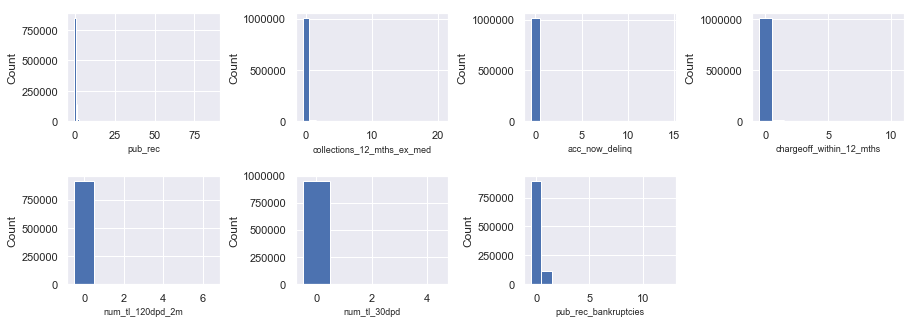

In [74]:
# TODO: Add title for the whole plot
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
for subplot, v in zip(ax.ravel(), log_diagnostics_before['all_3_quartiles_equal_both']):
    # Get associated column (drop missing values)
    col = all_data.loc[all_data[v].notnull(), v]
    # Make one bin for each value in the variable's range
    bins = np.arange(col.min() - 0.5, col.max() + 1.5)
    # Plot histogram 
    subplot.hist(col, bins=bins)
    subplot.set_ylabel('Count')
    subplot.set_xlabel(v, fontsize=9)
    
# Delete the last subplot that we didn't use
ax[1,-1].axis('off')

# Increase spacing between plots    
fig.subplots_adjust(hspace=.5, wspace=.5)
 
plt.show()
plt.close()

Note that I chose a bin-width of one for these histograms, and that the x-axis corresponds to each variable's range. The counts are so low everywhere, except at the lower end of the distribution, that they are not visible. Thus, each of these variables is extremely right-skewed, and a log-transformation does make sense to ameliorate this skewness somewhat. 

We are now ready to perform these transformations. In order to also include the variables we just examined in the transformation, we will explicitly pass their variable names as an argument.

In [75]:
# Carry out the transformations
all_data, all_data_levels_old, log_diagnostics_trans = \
    transform_skewness(all_data, min_dummies=min_dummies, max_dummies=max_dummies, 
                       dry_run=False, take_log=log_diagnostics_before['all_3_quartiles_equal_both'])

Number of variables to be transformed: 49
Number of variables left unchanged: 20



After having performed these feature transformations, let's plot the distribution of the numeric variables again in order to see to what extent skewness and outliers are still an unresolved problem.

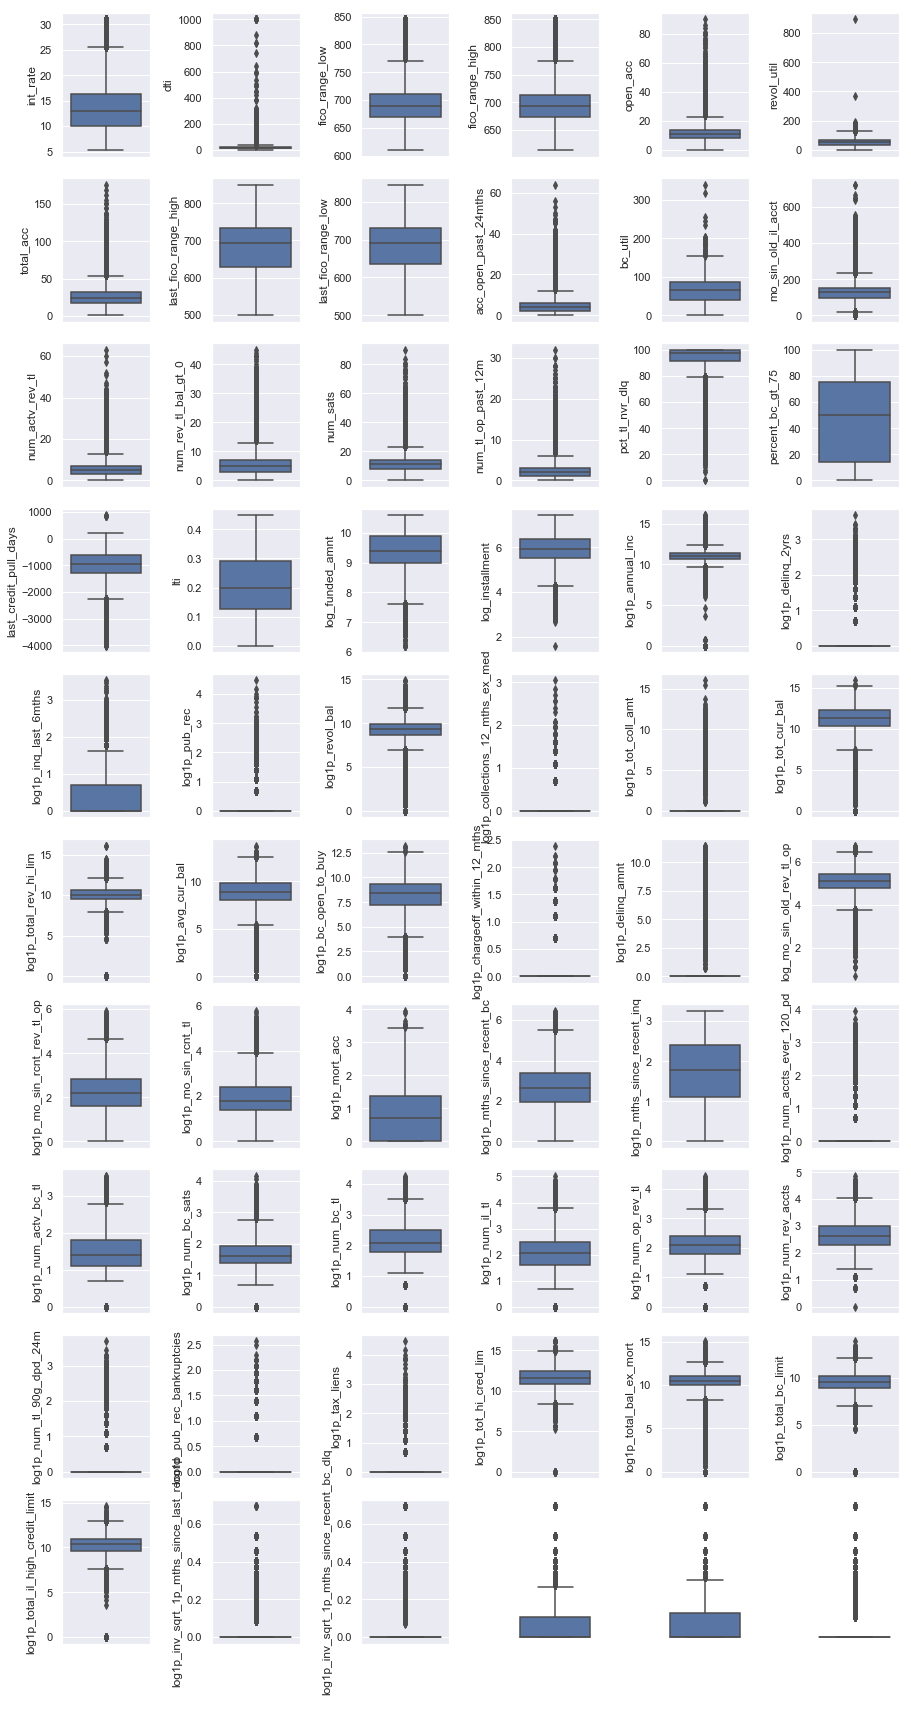

In [76]:
# get names of all the numeric variables
numerics = all_data.select_dtypes(include=[np.number]).columns.tolist()
# Count the number of unique values for each numeric variable
n_unique = all_data.loc[:, numerics].nunique()
# Add variables with more than 10 unique values to a list of variables to
# plot with a boxplot, otherwise to list for histogram
numerics_box = n_unique[n_unique >= 10].index
numerics_hist = n_unique[n_unique < 10].index  

# Make a boxplot for each
#with sns.axes_style('whitegrid'): # Discard Seaborn defaults
fig, ax = plt.subplots(nrows=10, ncols=6, figsize=(15,30))
for subplot, variable in zip(ax.ravel(), numerics_box):
    sns.boxplot(all_data.loc[all_data[variable].notnull(), variable],
                orient='v', ax=subplot)
    
# Delete the last subplots that we didn't need 
# (starting with the 5th in the last row)
for column_index in range(3, 6):
    ax[-1, column_index].axis('off')

# Increase spacing between plots    
fig.subplots_adjust(hspace=.15, wspace=.7)

plt.show()
plt.close()

#### Examining strings/objects

The following might have too many categories, so let's examine them in more detail:

In [77]:
for variable in ['emp_title', 'purpose', 'title']:
        print(variable, ':\n',
              all_data.loc[:, variable].value_counts().sort_values(ascending=False).head(20),
              '\n')

emp_title :
 Teacher               15166
Manager               13904
Owner                  6582
Registered Nurse       6345
RN                     6233
Supervisor             6052
Sales                  5373
Driver                 5165
Project Manager        4691
Office Manager         4009
General Manager        3709
Director               3654
manager                3424
Engineer               3190
teacher                3074
owner                  3065
President              2828
driver                 2718
Vice President         2571
Operations Manager     2535
Name: emp_title, dtype: int64 

purpose :
 debt_consolidation    600983
credit_card           221221
home_improvement       64927
other                  56854
major_purchase         21988
small_business         12293
medical                11262
car                    11181
moving                  7248
vacation                6674
house                   5205
wedding                 2341
renewable_energy         725
educati

Delete title, keep purpose.  They both refer to what the loan is used for, but purpose is selected from a set of given categories, while title is filled in by the borrower.  Therefore, while title can have more details when the loan doesn't fit into any of the given categories, it would have to do natural language processing to extract the meaning.  Since this is beyond the scope of this analysis, we will only use purpose.

#### Analyzing the variation over time of the target variable

Now we will analyze how loan default rates varied over time. We are particularly interested in whether default rates are substantially higher in the early years of our sample, which corresponds to the beginning of Landing Club's existence. Thus, their business model may still have been in flux, leading to higher default rates. 

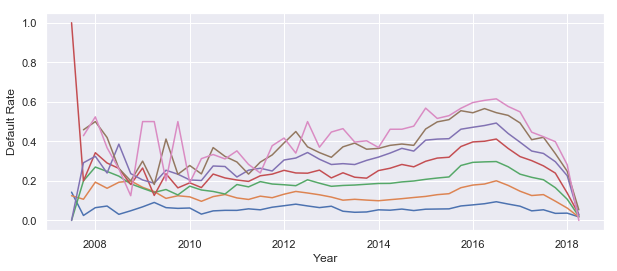

In [78]:
fig, ax = plt.subplots(figsize=(10, 4))
quarterly_default_rate = (
    all_data.reset_index(level='id', drop=True) # Keep only date as index
    .loc[:,['default', 'grade']] # Select variables of interest
    .groupby('grade') # Group by loan grade
    .resample('Q').mean() # Take the monthly average
    .unstack(level='grade')) 
ax.plot(quarterly_default_rate)
ax.set(xlabel='Year', ylabel='Default Rate');

Three things stand out from this plot: Firstly, default rates increased steadily, reaching a peak for loans issued in 2016. While we would expect cyclical fluctuations with changes in macroeconomic conditions, we would expect to see a peak a lot earlier – probably for loans issued in 2007, since most of these are scheduled to be paid back by 2010, so they would have been most affected by the recession. The only plausible explanation for the later peak is that Lending Club might have been moving moving into more risky loans over time, but did not keep the definitions of grades constant (but rather defined grades relative to their current lending practices).  This does not have to concern us to much, though, because we are not using grade as a predictor (since it is already the outcome of Lending Club's predictive model, as explained above). 

A more important insight for our purposes, however, is that about three years before the end of our sample period, the default rates begin to drop suspiciously, eventually reaching 0. I doubled checked that the date actually refers to the date the loan was issued rather than paid back, and that my calculation of the default rate excluded loans that are still current. Having eliminated these possibilities, the only remaining explanation is that a substantial number of loans were paid back early. 

While this biases the above graph by artificially lowering the default rates of recent loans, depending on how our predictive model includes the issue date as a predictor, it may or may not be a problem. I decided to model the time component by including a dummy variable for each quarter in the sample (and potentially combine quarters with low sample sizes). This gives us full flexibility in modeling variation over time, well-being sufficiently robust to overfitting due to our large sample size in each quarter. Due to this perfect flexibility of the time-dummies – compared to the estimates from a polynomial or spline for time – we don't have to worry about the artificially low default rates for the most recent observations.  This will simply make the affected time periods appear favorable, so we should not interpret the estimates of the time dummies for the affected quarters, But these are not of particular interest was anyway.  But more importantly, give this will not lead to any bias for our other coefficients, and thus won't affect our predictive accuracy. 

A third insight from the above graph is that there is much more variance in the default rates for the early years compared to later years. This makes it hard to tell whether those early years were also characterized by substantially higher default rates due to the business model not being optimized yet.  The first thing to investigate is whether the high variance for the early years is simply due to a low number of loans issued per quarter and grade. (Remember that the quarterly default rates we are  plotting are an average, so their variance is inversely proportional to the sample size.) Thus, let's plot those counts:

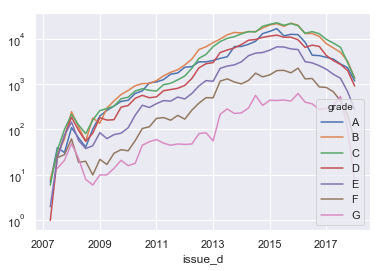

In [79]:

(all_data.reset_index(level='id', drop=True) # Keep only date as index
    .loc[:,['default', 'grade']] # Select variables of interest
    .groupby('grade') # Group by loan grade
    .resample('Q').count() # downsampling to quarterIf and count 
    .loc[:, 'default'] # Keep default, disregard grade (counts are identical)
    .unstack(level='grade')
    .plot(logy=True));

This indeed reveals that the number of loans per quarter increases steadily. Note that I used a logarithmic scale for the count, in order to better show the exact value for low counts.  This shows that category D, which had a 100% default rate in the first quarter of our sample, actually only had a sample size of one. The other grades all had sample sizes of below 10 for this quarter, so it is not surprising that the variance of the *average* default rate was high in the beginning.

Thus, there is no evidence that default rates were substantially higher in the beginning, and we therefore won't exclude observations from the early years. Of course, it is possible that excessive defaults in the beginning did occur but were masked by a less risky composition of the loan portfolio.  Thus, it would be ideal if we could look at ROI, Since this would clearly show whether Landing Club did a worse job selecting borrowers in the beginning. However, as explained above, we cannot calculate ROI precisely enough. In any case, even if default rates were higher in the beginning due to Lending Club's credit risk model being suboptimal, this should not  introduce any bias as long as this excessive risk is sufficiently captured but all the predictors we have.

In [80]:
all_data.loan_status.unique()

array(['Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Fully Paid', 'Charged Off', 'Default'], dtype=object)

In [81]:
# Make sure "fully paid" really means loan was repaid:
# Count for each quarter, how many were "fully repaid".
(all_data.reset_index(level='id', drop=True) # Keep only date as index
    .loc[:,['loan_status']] # Get loan status
    .resample('Q').apply(lambda x: (x=='Fully Paid').sum()))

,loan_status
issue_d,
2007-06-30,1
2007-09-30,71
2007-12-31,134
2008-03-31,485
2008-06-30,248
2008-09-30,158
2008-12-31,424
2009-03-31,682
2009-06-30,840


This confirms our hypothesis: Note that the number of loans per quarter whose status is "fully repaid" keeps increasing until about 3 years before the end of our data. This reflects that the number of loans issued increased over time.  However, at this point,  the count starts to drop, down to only about 10% of the maximum for the last quarter. This indicates that the substantial number of borrowers pay back their loan prematurely.

### Get rid of variables marked for deletion

In [82]:
all_data = all_data.drop(endogenous_2 + variables_to_drop_3, axis='columns')

### Making sure categorical variables don't have too many categories
The last step our data cleaning process is to make sure we don't have any categorical variables with too many categories, because this will cause the number of features to explode when performing one-hot encoding.

In [83]:
# Inspect number of categories for categorical variables
all_data.select_dtypes(include='object') \
    .nunique() \
    .sort_values(ascending=False) \
    .head(10)

emp_title              322952
title                   62405
zip_code                  938
addr_state                 51
purpose                    14
emp_length                 11
home_ownership              6
verification_status         3
disbursement_method         2
application_type            2
dtype: int64

In [84]:
# Drop variables
all_data = all_data.drop(['emp_title','title', 'zip_code'], 
                         axis='columns')

## Save/load data 

In [86]:
# Pickle data frame
with open('data_processed/all_data.pickle', 'wb') as pickled_file: 
    pickle.dump(all_data, pickled_file) 

In [87]:
# Raise error, because we only want to execute the next cell manually
raise Exception

Exception: 

In [1]:
# Load libraries and data
import pdb 
import glob
import copy
import math

import numpy as np
import pandas as pd
import scipy as sp
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
 
import missingno  # for visualizing missing data
import pickle

%matplotlib inline 
sns.set()

with open('data_processed/all_data.pickle', 'rb') as pickled_file: 
    all_data = pickle.load(pickled_file) # Un-pickle file